## Aufgabe zum Gradientenverfahren

#### Imports & Settings

In [1]:
# in this code block we gather all imports

import numpy as np

# MinMaxScaler for data normalization
from sklearn.preprocessing import MinMaxScaler

# for some plots e.g. for plotting error functions
from matplotlib import pyplot as plt

# we import pandas only since it is needed by ppscore
import pandas as pd

# ppscore for exploratory data analysis
import ppscore as pps

# more statistics for exploratory data analysis
from scipy import stats

# the following can be used for type hints regarding numpy arrays
# however there is an open question if this includes also scalars
# or whether to support also scalars would require another type for the type hints
# or perhaps an or-combination of ArrayLike with another type
#from numpy.typing import ArrayLike


#### Load Data

In [2]:
# in this code block we load the data

# this is the number of data points aka. instances in the given dataset
number_of_known_data_points = 14

x_known_unsorted = np.asarray([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290]).astype('float32')
assert x_known_unsorted.shape == (number_of_known_data_points,)
assert x_known_unsorted.dtype == 'float32'

y_known_unsorted = np.asarray([44,97,30,51,95,51,44,41,21,40,90,83,61,92]).astype('float32')
assert y_known_unsorted.shape == (number_of_known_data_points,)
assert y_known_unsorted.dtype == 'float32'

dataset_known_unsorted = np.asarray([ x_known_unsorted, y_known_unsorted ]).transpose()
print(f"dataset_known_unsorted=\n{dataset_known_unsorted}")
assert dataset_known_unsorted.shape == (number_of_known_data_points,2)
assert dataset_known_unsorted.dtype == 'float32'

# in this code section we obtain the same matrix however sorted by x
# the following call would sort all columns individually which we do not want
#dataset_known.sort(axis=0)
# instead here we want to sort the rows by the values in the first column
dataset_known_intermediate_view = dataset_known_unsorted[:, 0]
dataset_known_intermediate_indices_for_sorting = dataset_known_intermediate_view.argsort()
print(dataset_known_intermediate_indices_for_sorting)
dataset_known = dataset_known_unsorted[dataset_known_intermediate_indices_for_sorting]
assert dataset_known.shape == (number_of_known_data_points,2)
assert dataset_known.dtype == 'float32'
print(dataset_known.shape)
print(f"dataset_known=\n{dataset_known}")

# we sorted dataset_known by the x values so now we get the x_known sorted as well
x_known = dataset_known[:,0]
assert x_known.shape == (number_of_known_data_points,)
assert x_known.dtype == 'float32'
print(f"x_known=\n{x_known}")

# we sorted dataset_known by the x values so now we get the x_known sorted as well
y_known = dataset_known[:,1]
assert y_known.shape == (number_of_known_data_points,)
assert y_known.dtype == 'float32'
print(f"y_known=\n{y_known}")

dataset_known_unsorted=
[[  84.   44.]
 [1323.   97.]
 [ 282.   30.]
 [ 957.   51.]
 [1386.   95.]
 [ 810.   51.]
 [ 396.   44.]
 [ 474.   41.]
 [ 501.   21.]
 [ 660.   40.]
 [1260.   90.]
 [1005.   83.]
 [1110.   61.]
 [1290.   92.]]
[ 0  2  6  7  8  9  5  3 11 12 10 13  1  4]
(14, 2)
dataset_known=
[[  84.   44.]
 [ 282.   30.]
 [ 396.   44.]
 [ 474.   41.]
 [ 501.   21.]
 [ 660.   40.]
 [ 810.   51.]
 [ 957.   51.]
 [1005.   83.]
 [1110.   61.]
 [1260.   90.]
 [1290.   92.]
 [1323.   97.]
 [1386.   95.]]
x_known=
[  84.  282.  396.  474.  501.  660.  810.  957. 1005. 1110. 1260. 1290.
 1323. 1386.]
y_known=
[44. 30. 44. 41. 21. 40. 51. 51. 83. 61. 90. 92. 97. 95.]


### Exploratory Data Analysis

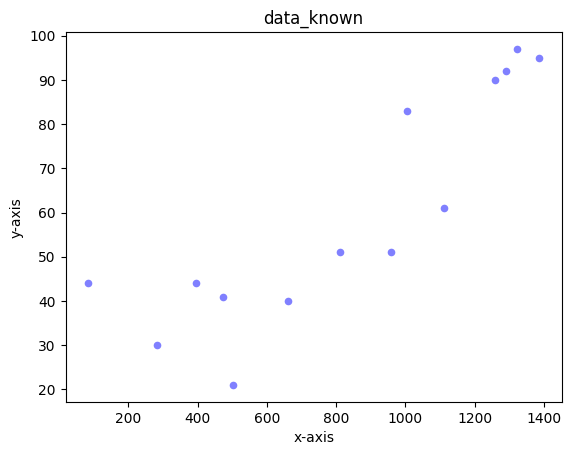

mean=[824.1429  60.    ]
trimmed_mean=[839.        60.166668]
mode=ModeResult(mode=array([[84., 44.]], dtype=float32), count=array([[1, 2]]))
range=[1302.   76.]
iqr=[741.75  46.5 ]
percentile_10=[316.2  33. ]
percentile_25=[480.75  41.75]
median=[883.5  51. ]
percentile_75=[1222.5    88.25]
percentile_90=[1313.1   94.1]
mad=[366.        22.571428]
std=[412.55402  25.21904]
var=[170200.83    636.  ]

correlation_matrix=
[[1.   0.87]
 [0.87 1.  ]]


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,y,0.406879,regression,True,mean absolute error,21.285715,12.625000,DecisionTreeRegressor()
2,y,x,0.533897,regression,True,mean absolute error,366.000000,170.593750,DecisionTreeRegressor()
3,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


In [3]:
# in this code block we do an EDA

# plain line plot
plt.figure(dpi=100)
plt.plot(x_known,y_known,linestyle='',marker='.',markersize=11.,markerfacecolor='#8080ff',markeredgewidth=.0)
plt.title('data_known')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# location parameters
print(f"mean={dataset_known.mean(axis=0)}")
print(f"trimmed_mean={stats.trim_mean(dataset_known.astype('float32'), proportiontocut=0.10, axis=0)}")
print(f"mode={stats.mode(dataset_known, keepdims=True)}")

# statistical dispersion measures
def range_np(a: np.ndarray) -> np.ndarray:
    result = a.max(axis=0) - a.min(axis=0)
    return result

print(f"range={range_np(dataset_known)}")
print(f"iqr={stats.iqr(dataset_known, axis=0)}")

print(f"percentile_10={np.percentile(dataset_known, 10.0, axis=0)}")
print(f"percentile_25={np.percentile(dataset_known, 25.0, axis=0)}")
print(f"median={np.percentile(dataset_known, 50.0, axis=0)}")
print(f"percentile_75={np.percentile(dataset_known, 75.0, axis=0)}")
print(f"percentile_90={np.percentile(dataset_known, 90.0, axis=0)}")

def mad_np(a: np.ndarray) -> np.ndarray:
    result = np.mean(np.absolute(a - np.mean(a, axis=0)), axis=0)
    return result

print(f"mad={mad_np(dataset_known)}")

print(f"std={dataset_known.std(axis=0)}")
print(f"var={dataset_known.var(axis=0)}")

# association measures
print(f"\ncorrelation_matrix=\n{np.corrcoef(dataset_known, rowvar=False).round(decimals=2)}")

dataset_known_pd = pd.DataFrame(dataset_known, columns = ['x','y'])
predictive_power_score_matrix_all_pd = pps.matrix(dataset_known_pd, output='df')
predictive_power_score_matrix_all_pd.style.background_gradient(cmap='twilight', low=0.0, high=1.0)




### Normalize Data

In [4]:
# in this code block we normalize the data

scaler = MinMaxScaler()
scaler.fit(dataset_known)

# note that we do not need to sort again after scaler.transform(...)
# nor do we need to switch back to data type float32
# since the function preserves order and data type

dataset_known_norm = scaler.transform(dataset_known)
assert dataset_known_norm.shape == (number_of_known_data_points,2)
assert dataset_known.dtype == 'float32'
print(dataset_known_norm.shape)
print(f"dataset_known_norm=\n{dataset_known}")

x_known_norm = dataset_known_norm[:,0]
assert x_known_norm.shape == (number_of_known_data_points,)
assert x_known_norm.dtype == 'float32'
print(f"x_known_norm=\n{x_known_norm}")

y_known_norm = dataset_known_norm[:,1]
assert y_known_norm.shape == (number_of_known_data_points,)
assert y_known_norm.dtype == 'float32'
print(f"y_known_norm=\n{y_known_norm}")


(14, 2)
dataset_known_norm=
[[  84.   44.]
 [ 282.   30.]
 [ 396.   44.]
 [ 474.   41.]
 [ 501.   21.]
 [ 660.   40.]
 [ 810.   51.]
 [ 957.   51.]
 [1005.   83.]
 [1110.   61.]
 [1260.   90.]
 [1290.   92.]
 [1323.   97.]
 [1386.   95.]]
x_known_norm=
[0.         0.15207374 0.23963133 0.29953918 0.3202765  0.44239634
 0.5576037  0.6705069  0.70737326 0.7880184  0.9032258  0.92626727
 0.9516129  1.        ]
y_known_norm=
[0.3026316  0.11842108 0.3026316  0.26315793 0.         0.25000003
 0.39473686 0.39473686 0.81578946 0.5263158  0.90789473 0.93421054
 1.         0.9736842 ]


### Exploratory Data Analysis on normalized data

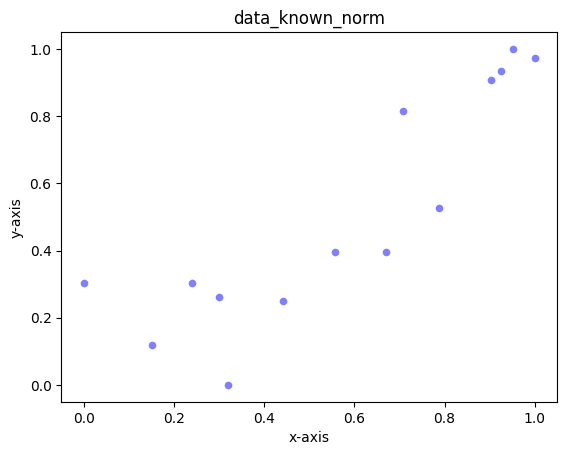

mean=[0.56846607 0.5131579 ]
trimmed_mean=[0.57987714 0.5153509 ]
mode=ModeResult(mode=array([[0.       , 0.3026316]], dtype=float32), count=array([[1, 2]]))
range=[1. 1.]
iqr=[0.56970043 0.61184207]
percentile_10=[0.17834102 0.15789476]
percentile_25=[0.30472351 0.27302635]
median=[0.61405531 0.39473686]
percentile_75=[0.87442394 0.88486841]
percentile_90=[0.9440092 0.9618421]
mad=[0.28110597 0.29699248]
std=[0.31686178 0.33182946]
var=[0.10040139 0.1101108 ]

correlation_matrix=
[[1.   0.87]
 [0.87 1.  ]]


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,y,0.406879,regression,True,mean absolute error,0.280075,0.166118,DecisionTreeRegressor()
2,y,x,0.533897,regression,True,mean absolute error,0.281106,0.131024,DecisionTreeRegressor()
3,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


In [5]:
# in this code block we run the EDA again this time on the normalized data

# plain line plot
plt.figure(dpi=100)
plt.plot(x_known_norm,y_known_norm,linestyle='',marker='.',markersize=11.,markerfacecolor='#8080ff',markeredgewidth=.0)
plt.title('data_known_norm')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# location parameters
print(f"mean={dataset_known_norm.mean(axis=0)}")
print(f"trimmed_mean={stats.trim_mean(dataset_known_norm.astype('float32'), proportiontocut=0.10, axis=0)}")
print(f"mode={stats.mode(dataset_known_norm, keepdims=True)}")

# statistical dispersion measures
def range_np(a: np.ndarray) -> np.ndarray:
    result = a.max(axis=0) - a.min(axis=0)
    return result

print(f"range={range_np(dataset_known_norm)}")
print(f"iqr={stats.iqr(dataset_known_norm, axis=0)}")

print(f"percentile_10={np.percentile(dataset_known_norm, 10.0, axis=0)}")
print(f"percentile_25={np.percentile(dataset_known_norm, 25.0, axis=0)}")
print(f"median={np.percentile(dataset_known_norm, 50.0, axis=0)}")
print(f"percentile_75={np.percentile(dataset_known_norm, 75.0, axis=0)}")
print(f"percentile_90={np.percentile(dataset_known_norm, 90.0, axis=0)}")

def mad_np(a: np.ndarray) -> np.ndarray:
    result = np.mean(np.absolute(a - np.mean(a, axis=0)), axis=0)
    return result

print(f"mad={mad_np(dataset_known_norm)}")

print(f"std={dataset_known_norm.std(axis=0)}")
print(f"var={dataset_known_norm.var(axis=0)}")

# association measures
print(f"\ncorrelation_matrix=\n{np.corrcoef(dataset_known_norm, rowvar=False).round(decimals=2)}")

dataset_known_norm_pd = pd.DataFrame(dataset_known_norm, columns = ['x','y'])
predictive_power_score_matrix_all_pd = pps.matrix(dataset_known_norm_pd, output='df')
predictive_power_score_matrix_all_pd.style.background_gradient(cmap='twilight', low=0.0, high=1.0)


### Model Function

In [6]:
# in this code block we define our model function

# design aspects
# only one feature
# purely linear without any non-linear terms
# degree of the polynomial is 1
# thus also only one weight per feature
# b as an additive weight representing bias

# first in pure python for single x values
# note that the expressions behind the colons and behind the -> are just type hints
# in this case all hinting at float
# they might be disregarded as python in general does not check the types of values on function call
def f_pure_python(w : float, x: float, b: float) -> float:
    y = w * x + b
    return y

# now with numpy for any numpy array of any number of x values

# w stands for the weight or weights
# x stands for one or more x values
# b stands for the bias

def f(w: np.ndarray, x: np.ndarray, b: np.ndarray) -> np.ndarray:
    # note that these fancy pre-condition checks are out-commented
    # so as to also support cases in which w or b or x is provided as a plain vanilla python float
    # pre-condition checks
    #assert w.shape == (), "w must be a numpy scalar"
    #assert np.isscalar(w), "w must be a numpy scalar"
    #assert w.dtype == 'float32', "w must be of dtype float32"
    #assert b.shape == (), "b must be a numpy scalar"
    #assert np.isscalar(b), "b must be a numpy scalar"
    #assert b.dtype == 'float32', "b must be of dtype float32"
    #assert x.dtype == 'float32', "xs must be of dtype float32"
    y = w * x + b
    # note that these fancy post-condition checks are out-commented
    # so as to also support cases in which w or b or x are provided as a plain vanilla floats
    # interestingly this basically makes the function definition the same as in the pure form above
    # post-condition checks
    #assert y.dtype == 'float32', "y must be of dtype float32"
    #assert y.shape == x.shape, "y must be of same shape as xs"
    return y

# again this time as a numpy ufunc for better efficiency in numpy contexts

# in this case we chose to include _np_ufunc in the variable name referencing the function
# just to distinguish it from the above variants of the same function

f_np_ufunc = np.frompyfunc(f, 3, 1)

assert type(f_pure_python) != np.ufunc
assert type(f) != np.ufunc
assert type(f_np_ufunc) == np.ufunc

# note that functions wrapped via frompyfunc always return numpy arrays with dtype object

# also note that the speed advantage provided by making a ufunc via frompyfunc
# will be irrelevant if numba is used
# see https://numba.readthedocs.io/en/stable/user/5minguide.html



x_known=
[  84.  282.  396.  474.  501.  660.  810.  957. 1005. 1110. 1260. 1290.
 1323. 1386.]
y_known=
[44. 30. 44. 41. 21. 40. 51. 51. 83. 61. 90. 92. 97. 95.]
y_line_example_2=
[20.567 31.096 37.158 41.306 42.742 51.197 59.174 66.991 69.543 75.127
 83.104 84.699 86.454 89.804]
y_line_example=
[20.567 31.096 37.158 41.306 42.742 51.197 59.174 66.991 69.543 75.127
 83.104 84.699 86.454 89.804]
y_line_example_from_np_ufunc=
[20.56692  31.096083 37.15833  41.306183 42.741978 51.197216 59.173855
 66.99096  69.54349  75.12714  83.103775 84.699104 86.453964 89.80415 ]
y_line_example_from_np_ufunc.shape=
(14,)
y_line_example_from_np_ufunc.dtype=
float32
y_line_example_diff=
[ 23.433  -1.096   6.842  -0.306 -21.742 -11.197  -8.174 -15.991  13.457
 -14.127   6.896   7.301  10.546   5.196]
y_line_example_sum_of_squares=
2137.556884765625


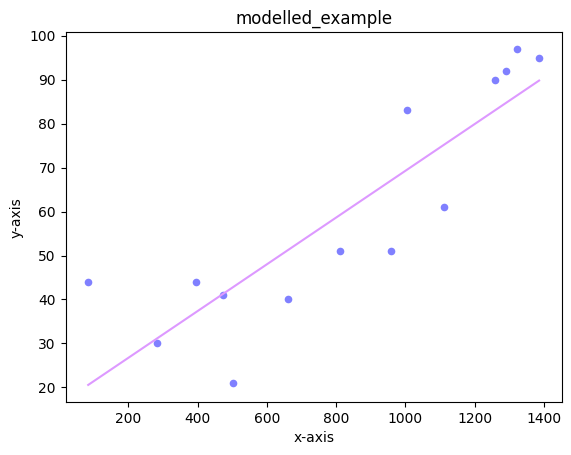

In [7]:
# in this code block we just try out the model function

print(f"x_known=\n{x_known}")
print(f"y_known=\n{y_known}")

# our more carefully chosen examples for w and b as plain python floats
w1_guess = 0.0531776
assert np.isscalar(w1_guess)
b_guess = 16.1
assert np.isscalar(b_guess)

# try out the numpy version with our known x values
y_line_example_2 = f(w1_guess, x_known, b_guess)
assert y_line_example_2.shape == y_known.shape
assert y_line_example_2.dtype == 'float32'
assert not np.isscalar(y_line_example_2)
print(f"y_line_example_2=\n{np.round(y_line_example_2, 3)}")

# our more carefully chosen examples for w and b as numpy arrays
w1_np = np.asarray([w1_guess], dtype='float32')
assert w1_np.shape == (1,)
assert not np.isscalar(w1_np)
b_np = np.asarray([b_guess], dtype='float32')
assert b_np.shape == (1,)
assert not np.isscalar(b_np)

# check if it also works if we provide the one weight and the bias as numpy arrays
y_line_example = f(w1_np, x_known, b_np)
assert y_line_example.shape == y_known.shape
assert y_line_example.dtype == 'float32'
assert not np.isscalar(y_line_example)
print(f"y_line_example=\n{np.round(y_line_example, 3)}")

# check if it also works if we provide the one weight and the bias as numpy arrays
y_line_example_from_np_ufunc = f_np_ufunc(w1_np, x_known, b_np).astype('float32')
assert y_line_example_from_np_ufunc.shape == y_known.shape
print(f"y_line_example_from_np_ufunc=\n{y_line_example_from_np_ufunc}")
print(f"y_line_example_from_np_ufunc.shape=\n{y_line_example_from_np_ufunc.shape}")
print(f"y_line_example_from_np_ufunc.dtype=\n{y_line_example_from_np_ufunc.dtype}")

# the values in the last two result arrays should equal
assert (y_line_example == y_line_example_2).all()
#assert (y_line_example == y_line_example_from_np_ufunc).all()

# compute the diff to the known values
y_line_example_diff = y_known - y_line_example
print(f"y_line_example_diff=\n{np.round(y_line_example_diff, 3)}")

y_line_example_sum_of_squares = (y_line_example_diff ** 2).sum()
print(f"y_line_example_sum_of_squares=\n{np.round(y_line_example_sum_of_squares, 3)}")

# just a plain line plot of the model function regarding a try out with normalized data
plt.figure(dpi=100)
plt.plot(x_known,y_known,linestyle='',marker='.',markersize=11.,markerfacecolor='#8080ff',markeredgewidth=.0)
plt.plot(x_known,y_line_example,color='#dd99ff')
plt.title('modelled_example')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()


x_known_norm=
[0.         0.15207374 0.23963133 0.29953918 0.3202765  0.44239634
 0.5576037  0.6705069  0.70737326 0.7880184  0.9032258  0.92626727
 0.9516129  1.        ]
y_known_norm=
[0.3026316  0.11842108 0.3026316  0.26315793 0.         0.25000003
 0.39473686 0.39473686 0.81578946 0.5263158  0.90789473 0.93421054
 1.         0.9736842 ]
y_line_norm_example_2=
[-0.006  0.133  0.213  0.268  0.287  0.398  0.503  0.606  0.64   0.714
  0.819  0.84   0.863  0.907]
y_line_norm_example=
[-0.006  0.133  0.213  0.268  0.287  0.398  0.503  0.606  0.64   0.714
  0.819  0.84   0.863  0.907]
y_line_norm_example_diff=
[ 0.308 -0.015  0.09  -0.004 -0.287 -0.148 -0.108 -0.212  0.176 -0.187
  0.089  0.094  0.137  0.067]
y_line_norm_example_sum_of_squares=
0.3700000047683716


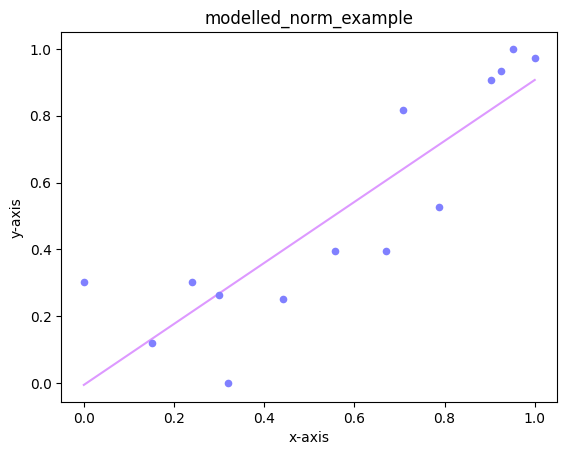

In [8]:
# in this code block we just try out the model function again this time with the normalized data

print(f"x_known_norm=\n{x_known_norm}")
print(f"y_known_norm=\n{y_known_norm}")

# our more carefully chosen examples for w and b as plain python floats
w1_guess_norm = 0.9129
#w1_guess_norm = 1.0
assert np.isscalar(w1_guess_norm)
b_guess_norm = -0.0058
#b_guess_norm = 0.001
assert np.isscalar(b_guess_norm)

# try out the numpy version with our known x values
y_line_norm_example_2 = f(w1_guess_norm, x_known_norm, b_guess_norm)
assert y_line_norm_example_2.shape == y_known_norm.shape
assert y_line_norm_example_2.dtype == 'float32'
assert not np.isscalar(y_line_norm_example_2)
print(f"y_line_norm_example_2=\n{np.round(y_line_norm_example_2, 3)}")

# our more carefully chosen examples for w and b as numpy arrays
w1_norm_np = np.asarray([w1_guess_norm], dtype='float32')
assert w1_norm_np.shape == (1,)
assert not np.isscalar(w1_norm_np)
b_norm_np = np.asarray([b_guess_norm], dtype='float32')
assert b_norm_np.shape == (1,)
assert not np.isscalar(b_norm_np)

# check if it also works if we provide the one weight and the bias as numpy arrays
y_line_norm_example = f(w1_norm_np, x_known_norm, b_norm_np)
assert y_line_norm_example.shape == y_known_norm.shape
assert y_line_norm_example.dtype == 'float32'
assert not np.isscalar(y_line_norm_example)
print(f"y_line_norm_example=\n{np.round(y_line_norm_example, 3)}")

# the values in the last two result arrays should equal
assert (y_line_norm_example == y_line_norm_example_2).all()

# compute the diff to the known values
y_line_norm_example_diff = y_known_norm - y_line_norm_example
print(f"y_line_norm_example_diff=\n{np.round(y_line_norm_example_diff, 3)}")

y_line_norm_example_sum_of_squares = (y_line_norm_example_diff ** 2).sum()
print(f"y_line_norm_example_sum_of_squares=\n{np.round(y_line_norm_example_sum_of_squares, 3)}")

# just a plain line plot of the model function regarding a try out with normalized data
plt.figure(dpi=100)
plt.plot(x_known_norm,y_line_norm_example,color='#dd99ff')
plt.plot(x_known_norm,y_known_norm,linestyle='',marker='.',markersize=11.,markerfacecolor='#8080ff',markeredgewidth=.0)
plt.title('modelled_norm_example')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

#### Error Functions

In [9]:
# in this code block we define the error functions

# for each error function we actually write down an efficient usual version and an explicit version
# the main difference is that
# the efficient versions expect the computed y-predictions as parameters
# the explicit versions expect the model function its parameters and call it

# also the efficient versions happen to be one-liners
# which does not say anything about performance

# y are the actual known values
# x are the corresponding x values
# f is the model function
# w is the weight used in the model function
# b is the bias used in the model function
# y_pred are the predictions computed using the model function

# sse formula is sum((y-f(x))^2)

def sse(y, y_hat):
    return np.square(y - y_hat).sum()

def sse_verbosely_implemented(y, y_hat):
    y_diff = y - y_hat
    squares = y_diff ** 2
    sum_of_squares = squares.sum()
    return sum_of_squares

def sse_explicit(y, x, f, w, b):
    # what does the model say?
    y_pred = f(w, x, b)
    # what is the difference to the actual result
    y_diff = y - y_pred
    # squared
    squares = np.square(y_diff)
    # summed up
    sum_of_squares = squares.sum()
    return sum_of_squares

# mse formula is sum((y-f(x))^2) / n

def mse(y, y_pred):
    return sse(y, y_pred) / len(y)

def mse_explicit(y, x, f, w, b):
    sum_of_squares = sse_explicit(y, x, f, w, b)
    # divided by the number of data points
    n = len(x)
    mse_value = sum_of_squares / n
    return mse_value

# rmse formula is sqrt(sum((y-f(x))^2) / n)

def rmse(y, y_pred):
    return np.sqrt(mse(y, y_pred))

def rmse_explicit(y, x, f, w, b):
    mse_value = mse_explicit(y, x, f, w, b)
    # square root thereof
    rmse_value = np.sqrt(mse_value)
    return rmse_value

# mae formula is sum(|y-f(x)|) / n

def mae(y, y_pred):
    return np.abs(y - y_pred).sum() / len(y)

def mae_explicit(y, x, f, w, b):
    # what does the model say?
    y_m = f(w, x, b)
    # what is the difference to the actual result
    y_diff = y - y_m
    # the absolute of that
    y_diff_abs = np.abs(y_diff)
    # summed up
    y_diff_abs_sum = y_diff_abs.sum()
    # divided by the number of data points
    n = len(x)
    mae_value = y_diff_abs_sum / n
    return mae_value



In [10]:
# in this code block we try out the efficiently implemented error functions

def error_functions_try_out(y, f, x, w1_scalar, w1_np, b_scalar, b_np):
    # check if it works if we provide w and b as pure python floats

    y_pred_using_scalars = f(w1_scalar, x, b_scalar)
    sse_example_using_scalars = sse(y, y_pred_using_scalars)
    assert np.isscalar(sse_example_using_scalars)
    print(f"sse_example_using_scalars={sse_example_using_scalars}")

    mse_example_using_scalars = mse(y, y_pred_using_scalars)
    assert np.isscalar(mse_example_using_scalars)
    print(f"mse_example_using_scalars={mse_example_using_scalars}")

    rmse_example_using_scalars = rmse(y, y_pred_using_scalars)
    assert np.isscalar(rmse_example_using_scalars)
    print(f"rmse_example_using_scalars={rmse_example_using_scalars}")

    mae_example_using_scalars = mae(y, y_pred_using_scalars)
    assert np.isscalar(mae_example_using_scalars)
    print(f"mae_example_using_scalars={mae_example_using_scalars}")

    # check if it also works if we provide w and b as numpy objects
    y_pred_np = f(w1_np, x, b_np)
    sse_example = sse(y, y_pred_np)
    assert np.isscalar(sse_example)
    print(f"sse_example={sse_example}")

    mse_example = mse(y, y_pred_np)
    assert np.isscalar(mse_example)
    print(f"mse_example={mse_example}")

    rmse_example = rmse(y, y_pred_np)
    assert np.isscalar(rmse_example)
    print(f"rmse_example={rmse_example}")

    mae_example = mae(y, y_pred_np)
    assert np.isscalar(mae_example)
    print(f"mae_example={mae_example}")

    assert sse_example_using_scalars == sse_example
    assert mse_example_using_scalars == mse_example
    assert rmse_example_using_scalars == rmse_example
    assert mae_example_using_scalars == mae_example

    return (sse_example, mse_example, rmse_example, mae_example)

# try with the original data
sse_example, mse_example, rmse_example, mae_example = error_functions_try_out(y_known, f, x_known, w1_guess, w1_np, b_guess, b_np)

# try with the normalized data
sse_example_norm, mse_example_norm, rmse_example_norm, mae_example_norm = error_functions_try_out(y_known_norm, f, x_known_norm, w1_guess_norm, w1_norm_np, b_guess_norm, b_norm_np)


sse_example_using_scalars=2137.55712890625
mse_example_using_scalars=152.68265206473214
rmse_example_using_scalars=12.356482188095937
mae_example_using_scalars=10.450262887137276
sse_example=2137.55712890625
mse_example=152.68265206473214
rmse_example=12.356482188095937
mae_example=10.450262887137276
sse_example_using_scalars=0.37005728483200073
mse_example_using_scalars=0.026432663202285767
rmse_example_using_scalars=0.1625812510786092
mae_example_using_scalars=0.13730193035943167
sse_example=0.37005728483200073
mse_example=0.026432663202285767
rmse_example=0.1625812510786092
mae_example=0.13730193035943167


In [11]:
# in this code block we try out the explicitly implemented error functions

def explicit_error_functions_try_out(y, f, x, w1_scalar, w1_np, b_scalar, b_np):
    # check if it works if we provide w and b as pure python floats
    sse_explicit_example_using_scalars = sse_explicit(y, x, f, w1_scalar, b_scalar)
    assert np.isscalar(sse_explicit_example_using_scalars)
    print(f"sse_explicit_example_using_scalars={sse_explicit_example_using_scalars}")

    mse_explicit_example_using_scalars = mse_explicit(y, x, f, w1_scalar, b_scalar)
    assert np.isscalar(mse_explicit_example_using_scalars)
    print(f"mse_explicit_example_using_scalars={mse_explicit_example_using_scalars}")

    rmse_explicit_example_using_scalars = rmse_explicit(y, x, f, w1_scalar, b_scalar)
    assert np.isscalar(rmse_explicit_example_using_scalars)
    print(f"rmse_explicit_example_using_scalars={rmse_explicit_example_using_scalars}")

    mae_explicit_example_using_scalars = mae_explicit(y, x, f, w1_scalar, b_scalar)
    assert np.isscalar(mae_explicit_example_using_scalars)
    print(f"mae_explicit_example_using_scalars={mae_explicit_example_using_scalars}")

    # check if it also works if we provide w and b as numpy objects
    sse_explicit_example = sse_explicit(y, x, f, w1_np, b_np)
    assert np.isscalar(sse_explicit_example)
    print(f"sse_explicit_example={sse_explicit_example}")

    mse_explicit_example = mse_explicit(y, x, f, w1_np, b_np)
    assert np.isscalar(mse_explicit_example)
    print(f"mse_explicit_example={mse_explicit_example}")

    rmse_explicit_example = rmse_explicit(y, x, f, w1_np, b_np)
    assert np.isscalar(rmse_explicit_example)
    print(f"rmse_explicit_example={rmse_explicit_example}")

    mae_explicit_example = mae_explicit(y, x, f, w1_np, b_np)
    assert np.isscalar(mae_explicit_example)
    print(f"mae_explicit_example={mae_explicit_example}")

    assert sse_explicit_example_using_scalars == sse_explicit_example
    assert mse_explicit_example_using_scalars == mse_explicit_example
    assert rmse_explicit_example_using_scalars == rmse_explicit_example
    assert mae_explicit_example_using_scalars == mae_explicit_example

    return (sse_explicit_example, mse_explicit_example, rmse_explicit_example, mae_explicit_example)

# try with the original data
sse_explicit_example, mse_explicit_example, rmse_explicit_example, mae_explicit_example = explicit_error_functions_try_out(y_known, f, x_known, w1_guess, w1_np, b_guess, b_np)

# try with the normalized data
sse_explicit_example_norm, mse_explicit_example_norm, rmse_explicit_example_norm, mae_explicit_example_norm = explicit_error_functions_try_out(y_known_norm, f, x_known_norm, w1_guess_norm, w1_norm_np, b_guess_norm, b_norm_np)


sse_explicit_example_using_scalars=2137.55712890625
mse_explicit_example_using_scalars=152.68265206473214
rmse_explicit_example_using_scalars=12.356482188095937
mae_explicit_example_using_scalars=10.450262887137276
sse_explicit_example=2137.55712890625
mse_explicit_example=152.68265206473214
rmse_explicit_example=12.356482188095937
mae_explicit_example=10.450262887137276
sse_explicit_example_using_scalars=0.37005728483200073
mse_explicit_example_using_scalars=0.026432663202285767
rmse_explicit_example_using_scalars=0.1625812510786092
mae_explicit_example_using_scalars=0.13730193035943167
sse_explicit_example=0.37005728483200073
mse_explicit_example=0.026432663202285767
rmse_explicit_example=0.1625812510786092
mae_explicit_example=0.13730193035943167


In [12]:
# in this code we check example results of our error functions

# error values computed by explicitly implemented error functions should equal the usual ones
assert sse_explicit_example == sse_example
assert mse_explicit_example == mse_example
assert rmse_explicit_example == rmse_example
assert mae_explicit_example == mae_example

# also for the normalized data
assert sse_explicit_example_norm == sse_example_norm
assert mse_explicit_example_norm == mse_example_norm
assert rmse_explicit_example_norm == rmse_example_norm
assert mae_explicit_example_norm == mae_example_norm

# however error values for normalized data should differ from error values for original data
assert sse_explicit_example != sse_example_norm
assert mse_explicit_example != mse_example_norm
assert rmse_explicit_example != rmse_example_norm
assert mae_explicit_example != mae_example_norm

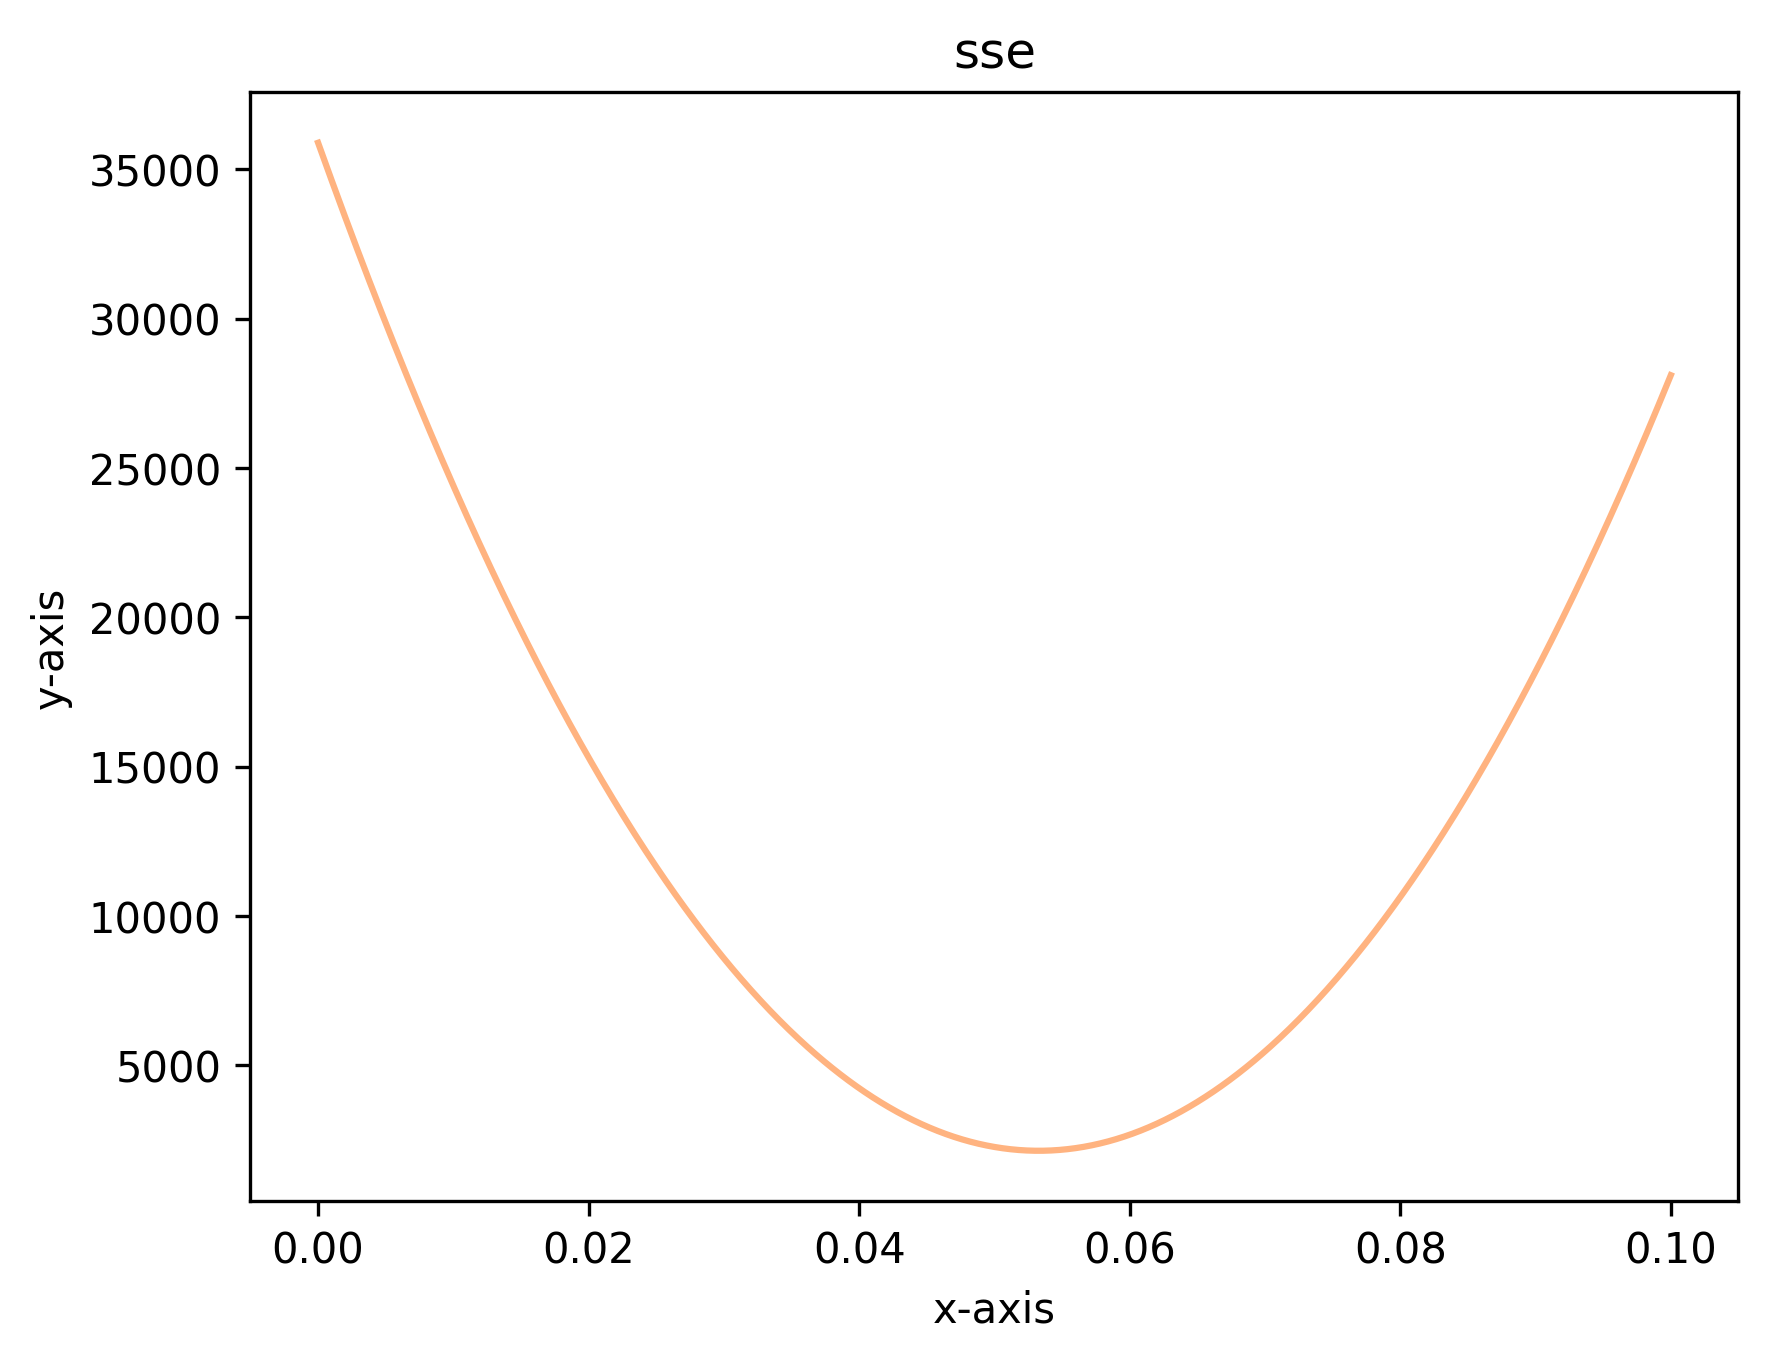

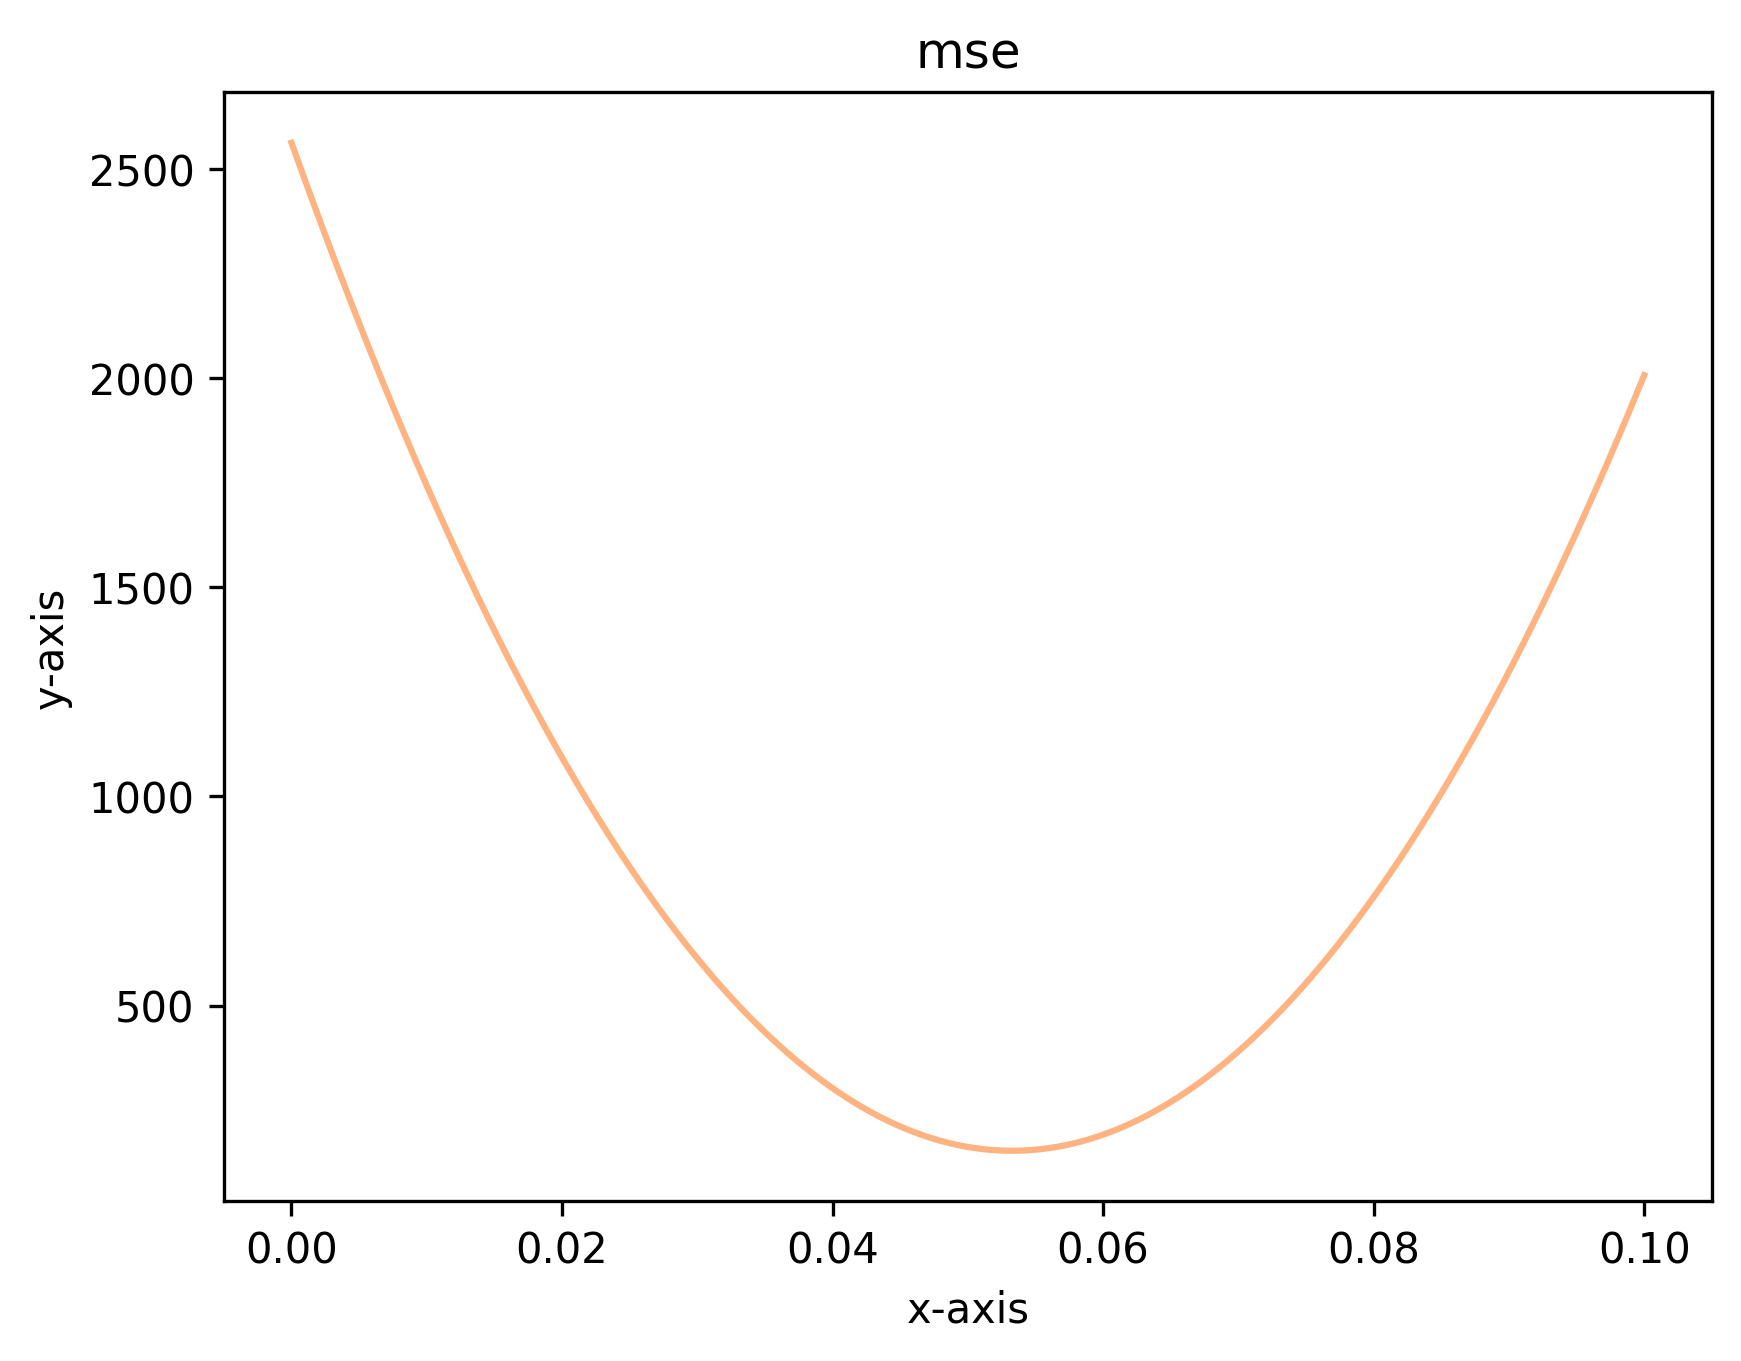

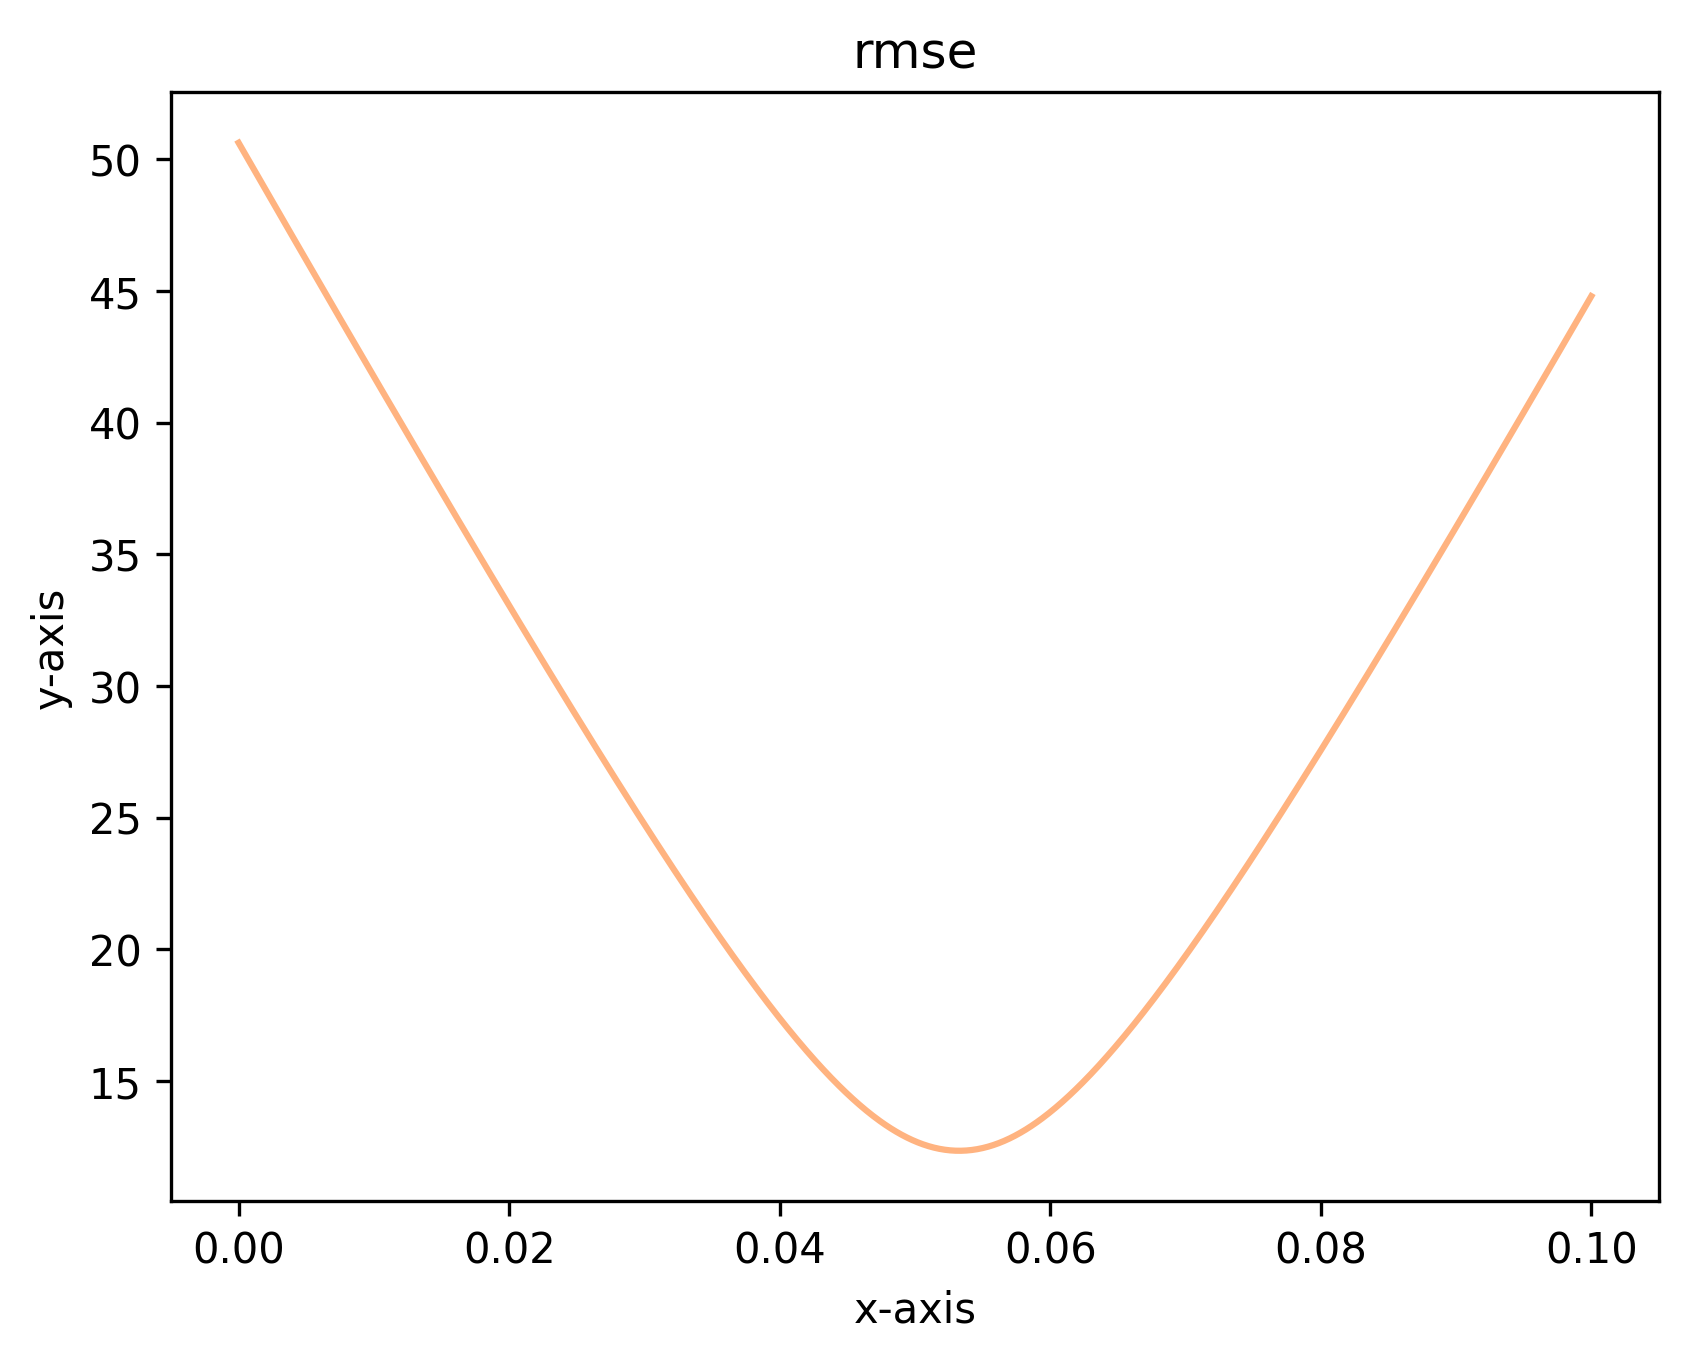

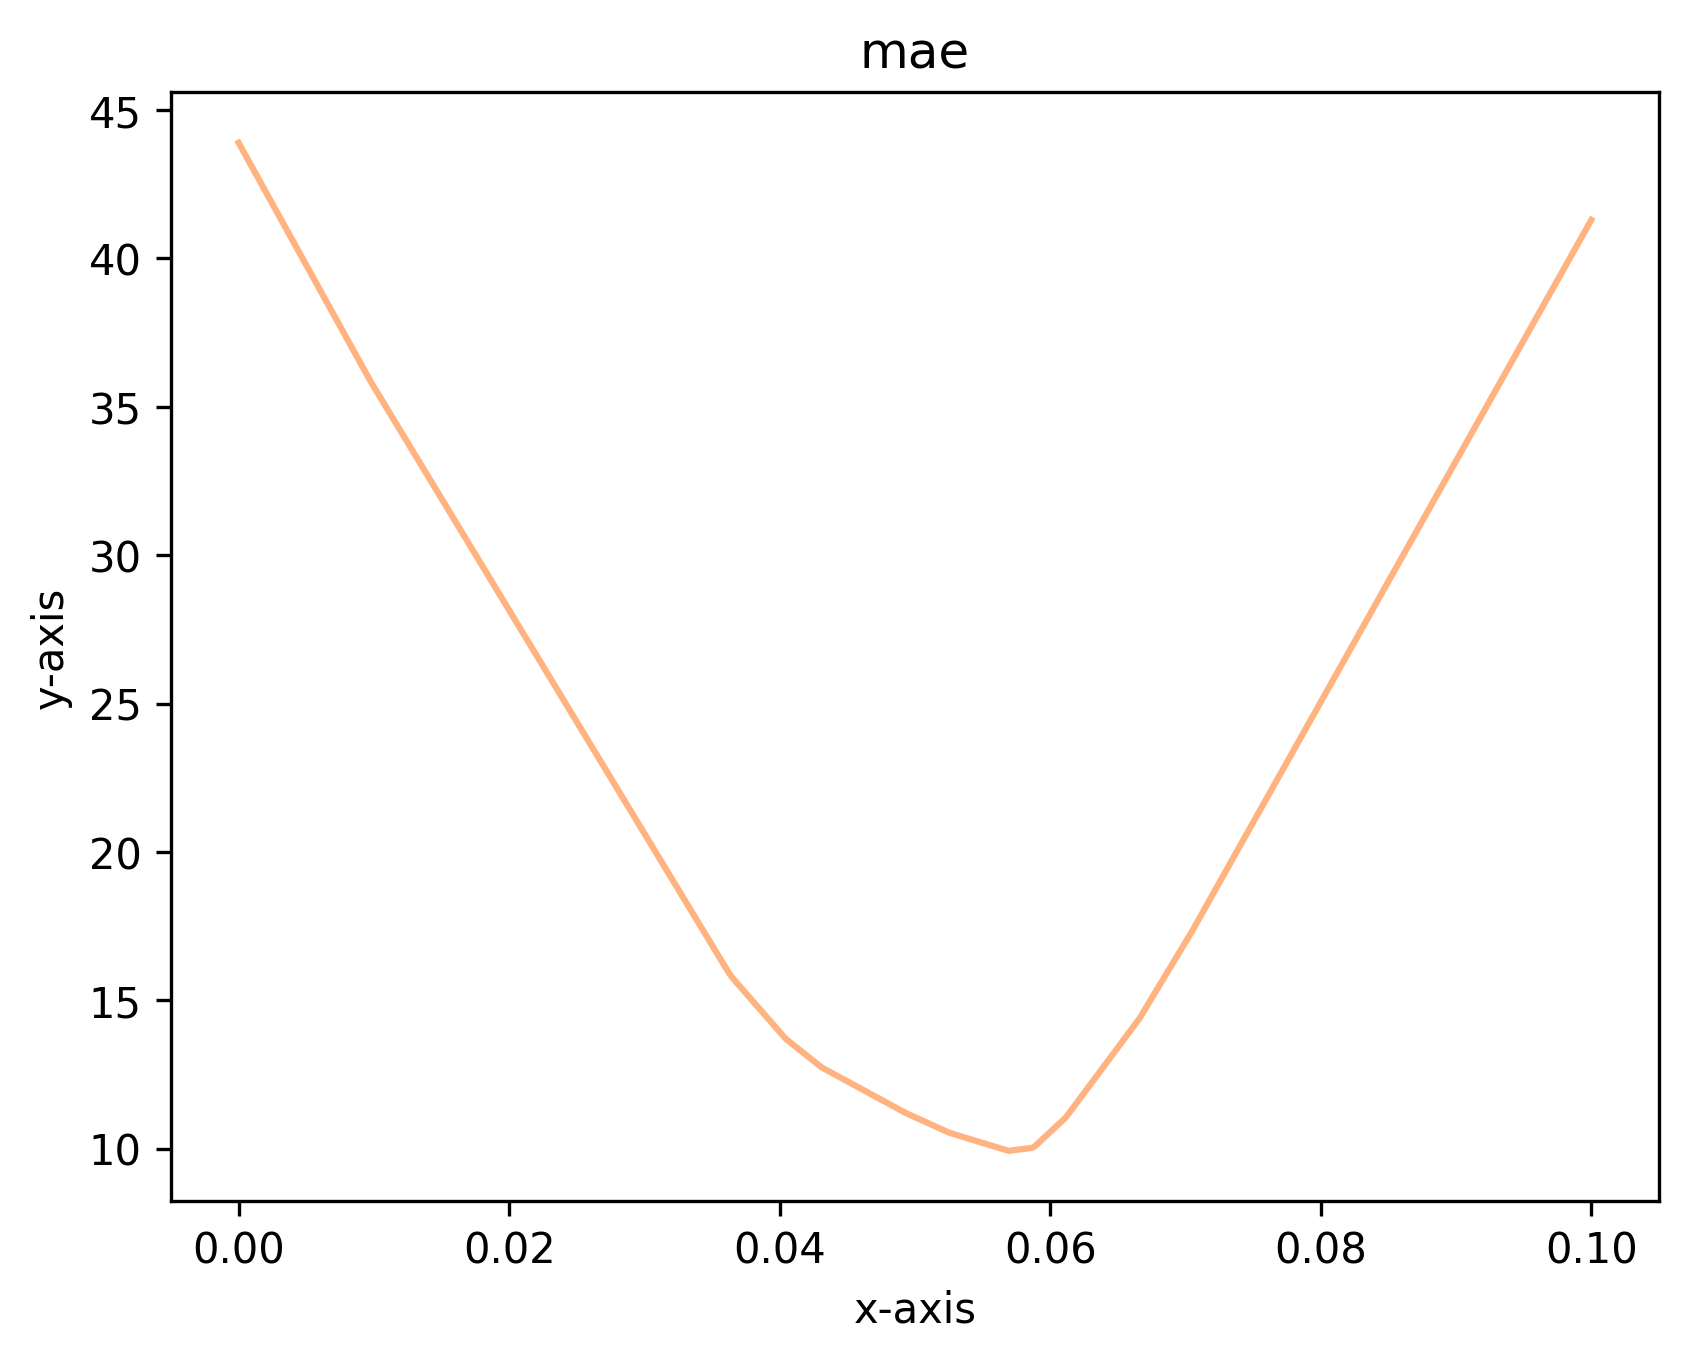

In [13]:
# in this code block we attempt to plot the error functions with respect to original data

# first let us create a sorted numpy array of arbitrary values for w1 i.e. the first weight
w1s_for_plot_np = np.arange(.0, 0.1001, .0001).astype('float32')

# we chose a value for b which we keep constant over all w1s
b_for_plot_scalar = b_guess

# note that in functional programming we would use currying instead
def f_with_fixed_xs_and_b(some_w1):
   return f(some_w1, x_known, b_for_plot_scalar)

# we still need to vectorize the function to be able to apply it to each element of a numpy array
f_with_fixed_xs_and_b_vectorized = np.vectorize(f_with_fixed_xs_and_b,otypes=[np.ndarray])

# we compute the predictions for each w1
y_pred_for_plot_np = f_with_fixed_xs_and_b_vectorized(w1s_for_plot_np)

# compute sse values
def sse_with_fixed_y(some_y_pred):
   return sse(y_known, some_y_pred)

sse_with_fixed_y_vectorized = np.vectorize(sse_with_fixed_y ,otypes=[np.ndarray])
sse_axis_values_np = np.apply_along_axis(sse_with_fixed_y_vectorized, axis=0, arr=y_pred_for_plot_np)

plt.figure(dpi=300)
plt.plot(w1s_for_plot_np, sse_axis_values_np,color='#ffb380')
plt.title('sse')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# compute mse values
def mse_with_fixed_y(some_y_pred):
   return mse(y_known, some_y_pred)

mse_with_fixed_y_vectorized = np.vectorize(mse_with_fixed_y ,otypes=[np.ndarray])
mse_axis_values_np = np.apply_along_axis(mse_with_fixed_y_vectorized, axis=0, arr=y_pred_for_plot_np)

plt.figure(dpi=300)
plt.plot(w1s_for_plot_np, mse_axis_values_np,color='#ffb380')
plt.title('mse')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# compute rmse values
def rmse_with_fixed_y(some_y_pred):
   return rmse(y_known, some_y_pred)

rmse_with_fixed_y_vectorized = np.vectorize(rmse_with_fixed_y ,otypes=[np.ndarray])
rmse_axis_values_np = np.apply_along_axis(rmse_with_fixed_y_vectorized, axis=0, arr=y_pred_for_plot_np)

plt.figure(dpi=300)
plt.plot(w1s_for_plot_np, rmse_axis_values_np,color='#ffb380')
plt.title('rmse')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# compute mae values
def mae_with_fixed_y(some_y_pred):
   return mae(y_known, some_y_pred)

mae_with_fixed_y_vectorized = np.vectorize(mae_with_fixed_y ,otypes=[np.ndarray])
mae_axis_values_np = np.apply_along_axis(mae_with_fixed_y_vectorized, axis=0, arr=y_pred_for_plot_np)

plt.figure(dpi=300)
plt.plot(w1s_for_plot_np, mae_axis_values_np,color='#ffb380')
plt.title('mae')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()


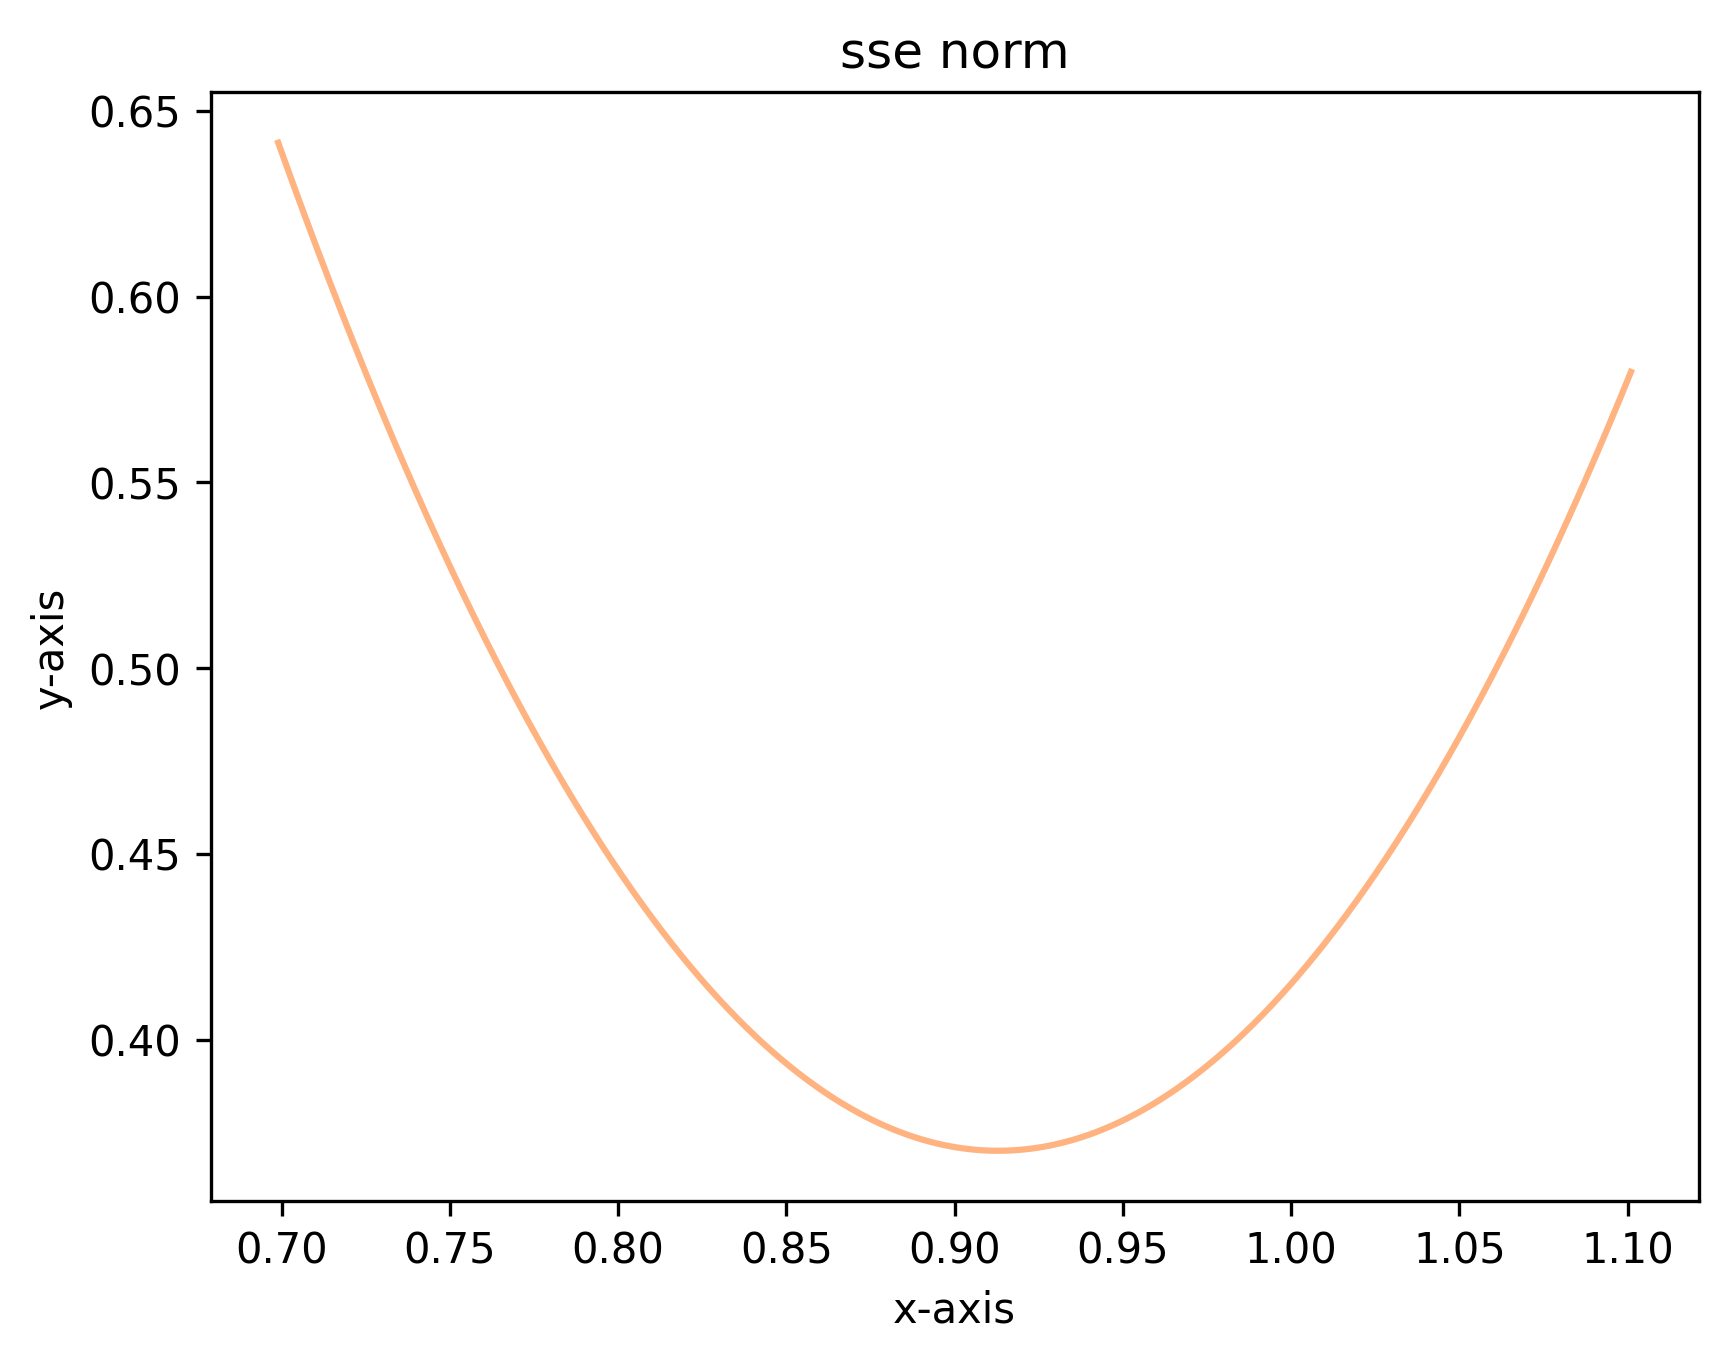

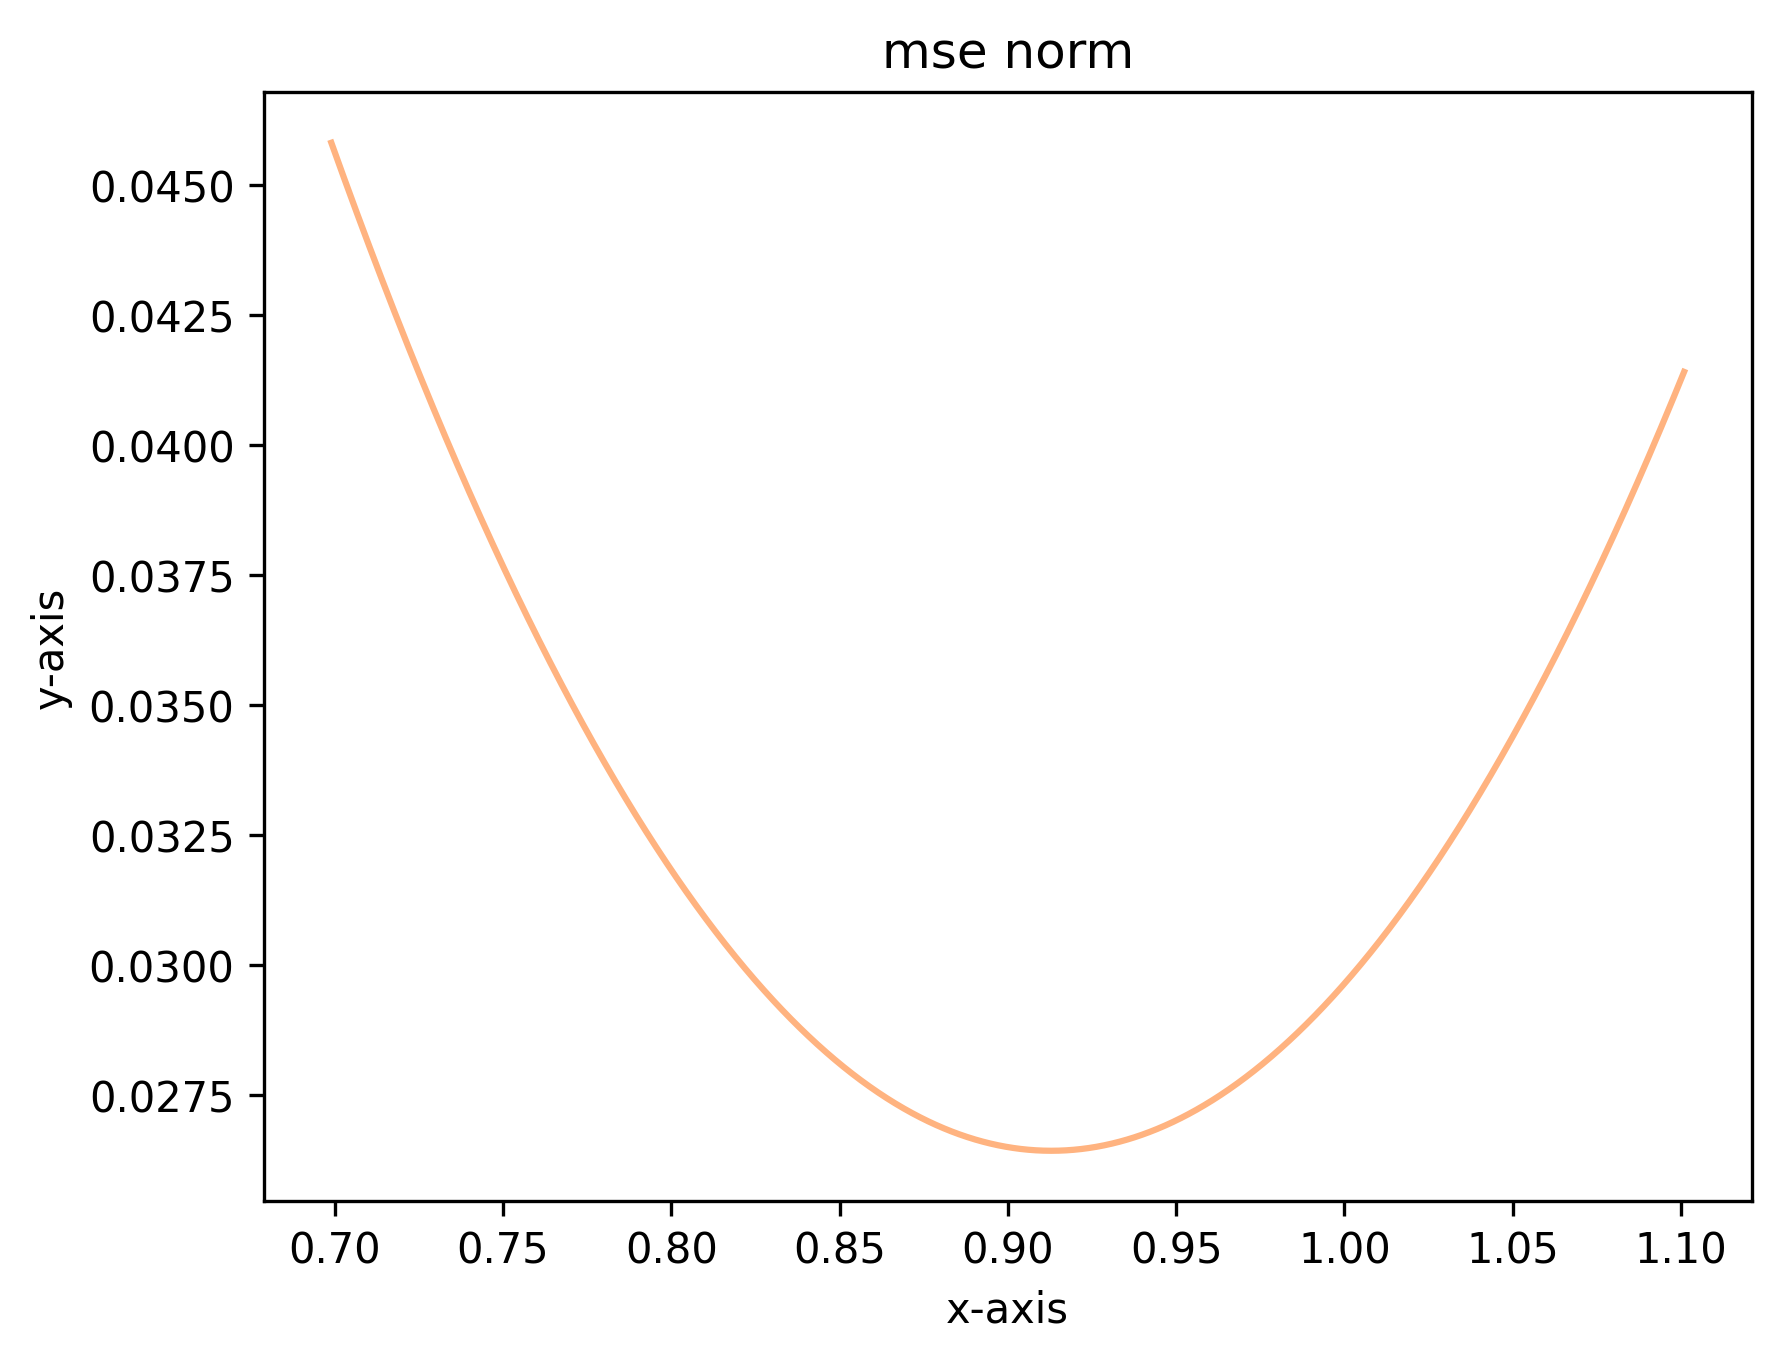

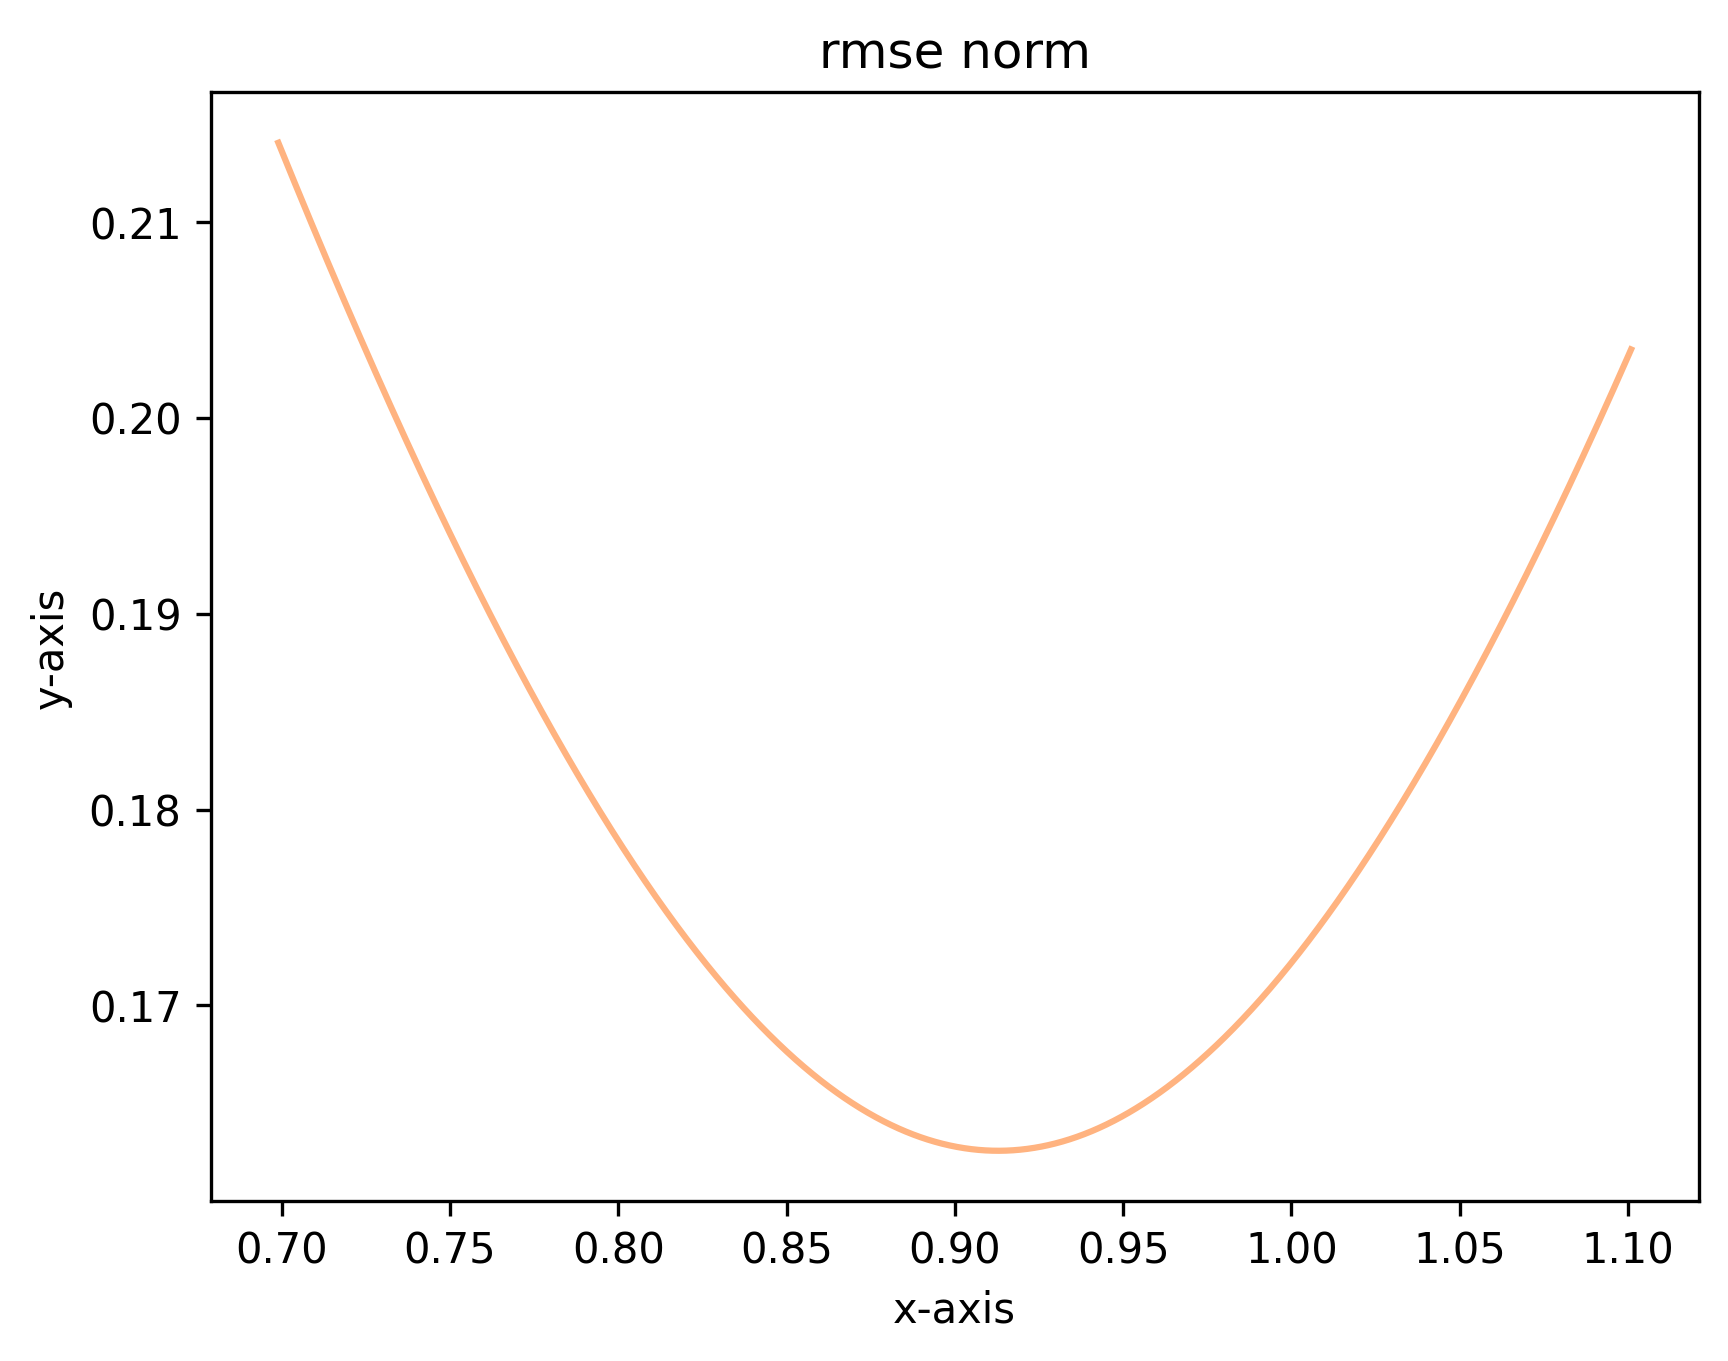

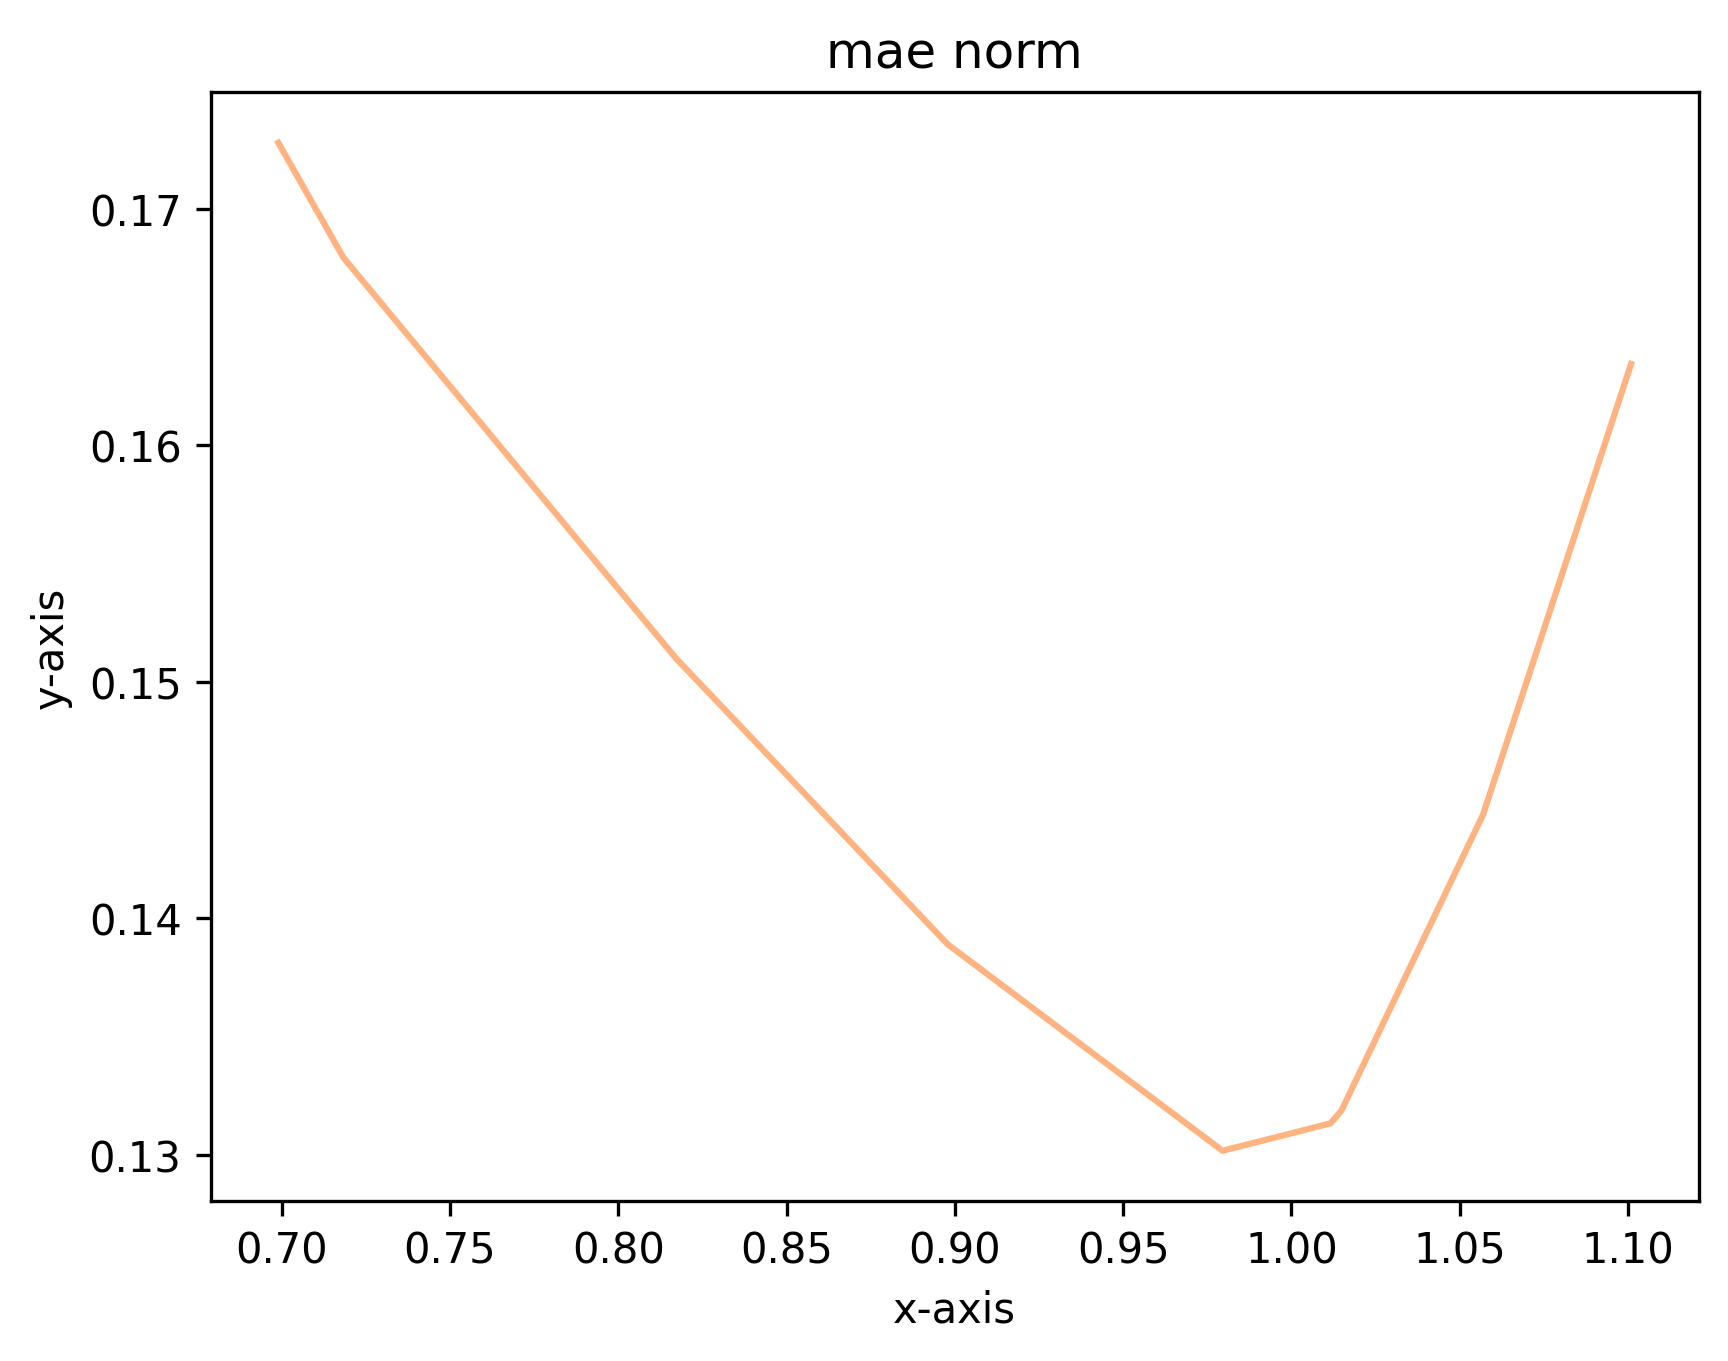

In [14]:
# in this code block we attempt to plot the error functions with respect to normalized data

# first let us create a sorted numpy array of arbitrary values for w1 i.e. the first weight
w1s_for_plot_norm_np = np.arange(.699, 1.101, .00005).astype('float32')

# we chose a value for b which we keep constant over all w1s
b_for_plot_norm_scalar = b_guess_norm

# note that in functional programming we would use currying instead
def f_with_fixed_xs_and_b_norm(some_w1_norm):
   return f(some_w1_norm, x_known_norm, b_for_plot_norm_scalar)

# we still need to vectorize the function to be able to appky it to each element of a numpy array
f_with_fixed_xs_and_b_norm_vectorized = np.vectorize(f_with_fixed_xs_and_b_norm,otypes=[np.ndarray])

# we compute the predictions for each w1
y_pred_norm_for_plot_np = f_with_fixed_xs_and_b_norm_vectorized(w1s_for_plot_norm_np)

# compute sse values
def sse_with_fixed_y_norm(some_y_pred_norm):
   return sse(y_known_norm, some_y_pred_norm)

sse_with_fixed_y_norm_vectorized = np.vectorize(sse_with_fixed_y_norm ,otypes=[np.ndarray])
sse_axis_values_norm_np = np.apply_along_axis(sse_with_fixed_y_norm_vectorized, axis=0, arr=y_pred_norm_for_plot_np)

plt.figure(dpi=300)
plt.plot(w1s_for_plot_norm_np, sse_axis_values_norm_np, color='#ffb380')
plt.title('sse norm')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# compute mse values
def mse_with_fixed_y_norm(some_y_pred_norm):
   return mse(y_known_norm, some_y_pred_norm)

mse_with_fixed_y_norm_vectorized = np.vectorize(mse_with_fixed_y_norm ,otypes=[np.ndarray])
mse_axis_values_norm_np = np.apply_along_axis(mse_with_fixed_y_norm_vectorized, axis=0, arr=y_pred_norm_for_plot_np)

plt.figure(dpi=300)
plt.plot(w1s_for_plot_norm_np, mse_axis_values_norm_np, color='#ffb380')
plt.title('mse norm')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# compute rmse values
def rmse_with_fixed_y_norm(some_y_pred_norm):
   return rmse(y_known_norm, some_y_pred_norm)

rmse_with_fixed_y_norm_vectorized = np.vectorize(rmse_with_fixed_y_norm ,otypes=[np.ndarray])
rmse_axis_values_norm_np = np.apply_along_axis(rmse_with_fixed_y_norm_vectorized, axis=0, arr=y_pred_norm_for_plot_np)

plt.figure(dpi=300)
plt.plot(w1s_for_plot_norm_np, rmse_axis_values_norm_np, color='#ffb380')
plt.title('rmse norm')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# compute mae values
def mae_with_fixed_norm_y(some_y_pred_norm):
   return mae(y_known_norm, some_y_pred_norm)

mae_with_fixed_y_norm_vectorized = np.vectorize(mae_with_fixed_norm_y ,otypes=[np.ndarray])
mae_axis_values_norm_np = np.apply_along_axis(mae_with_fixed_y_norm_vectorized, axis=0, arr=y_pred_norm_for_plot_np)

plt.figure(dpi=300)
plt.plot(w1s_for_plot_norm_np, mae_axis_values_norm_np, color='#ffb380')
plt.title('mae norm')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

#### Gradient Functions

In [15]:
# WIP
# in this code block we define the gradient functions with respect to the error functions

# derivatives as seen at
# https://spia.uga.edu/faculty_pages/mlynch/teaching/ols/OLSDerivation.pdf
# https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc

# note that many people rearrange the terms slightly to get rid of the minus in front
# note also that some people also try to get rid of the 2 in front
# finally note that in the following we consider b to be just a another variable name for w0

# we use the dot product
# which is just the sum of the products of the corresponding elements of two vectors

# partial derivative of sse with respect to w1
def sse_gradient_4_linear_regression_wrt_w1(y, y_hat, x):
    y_diff = y - y_hat
    return -2 * np.dot(x, y_diff)

# partial derivative of sse with respect to w1 explicitly implemented
def sse_gradient_4_linear_regression_wrt_w1_explicit(y, w1, x, b):
    result = -2 * np.dot(x, (y - ((w1 * x) + b)))
    return result

# partial derivative of sse with respect to b
# note that we also have x as a parameter here even though it is not used
# in order to have a streamlined signature compatible with the other error functions
def sse_gradient_4_linear_regression_wrt_b(y, y_hat, x):
    y_diff = y - y_hat
    return -2 * np.sum(y_diff)

# partial derivative of sse with respect to b explicitly implemented
def sse_gradient_4_linear_regression_wrt_b_explicit(y, w1, x, b):
    result = -2 * np.sum(y - ((w1 * x) + b))
    return result

# partial derivative of mse with respect to w1
def mse_gradient_4_linear_regression_wrt_w1(y, y_hat, x):
    n = len(x)
    y_diff = y - y_hat
    return (-2 / n) * np.dot(x, y_diff)

# partial derivative of mse with respect to w1 explicitly implemented
def mse_gradient_4_linear_regression_wrt_w1_explicit(y, w1, x, b):
    n = len(x)
    result = (-2 / n) * np.dot(x, (y - ((w1 * x) + b)))
    return result

# partial derivative of mse with respect to b
# note that len(x) could also be expressed as len(y) or len(y_hat)
# since these values are usually expected to be the same
def mse_gradient_4_linear_regression_wrt_b(y, y_hat, x):
    n = len(x)
    y_diff = y - y_hat
    return (-2 / n) * np.sum(y_diff)

# partial derivative of mse with respect to b explicitly implemented
def mse_gradient_4_linear_regression_wrt_b_explicit(y, w1, x, b):
    n = len(x)
    result = (-2 / n) * np.sum((y - ((w1 * x) + b)))
    return result

# rmse partial derivatives tbd

# mae partial derivatives tbd if at all possible


In [16]:
# in this code block we just try out the first-order partial derivatives of the error functions

# as far as we implemented them
# regarding both usually and explicitly implemented variants

def error_function_derivatives_try_out(y, w1_guess, x, b_guess):
    print(f"w1_guess={w1_guess}")
    print(f"b_guess={b_guess}")
    print(f"x={x}")
    print(f"y={y}")

    y_hat_at = f(w1_guess, x, b_guess)
    print(f"y_hat_at={y_hat_at}")

    y_diff_at = y - y_hat_at
    print(f"y_diff_at={y_diff_at}")

    sse_zero_check = sse(y, y)
    assert sse_zero_check == 0.0

    # quickly print the error values
    sse_at = sse(y, y_hat_at)
    print(f"sse_at={sse_at}")
    mse_at = mse(y, y_hat_at)
    print(f"mse_at={mse_at}")
    assert mse_at < sse_at

    # with respect to w1
    sse_gradient_wrt_w_at = sse_gradient_4_linear_regression_wrt_w1(y, y_hat_at, x)
    print(f"sse_gradient_wrt_w_at={sse_gradient_wrt_w_at}")

    sse_gradient_wrt_w_explicit_at = sse_gradient_4_linear_regression_wrt_w1_explicit(y, w1_guess, x, b_guess)
    print(f"sse_gradient_wrt_w_explicit_at={sse_gradient_wrt_w_explicit_at}")

    mse_gradient_wrt_w_at = mse_gradient_4_linear_regression_wrt_w1(y, y_hat_at, x)
    print(f"mse_gradient_wrt_w_at={mse_gradient_wrt_w_at}")

    mse_gradient_wrt_w_explicit_at = mse_gradient_4_linear_regression_wrt_w1_explicit(y, w1_guess, x, b_guess)
    print(f"mse_gradient_wrt_w_explicit_at={mse_gradient_wrt_w_explicit_at}")

    # with respect to b
    sse_gradient_wrt_b_at = sse_gradient_4_linear_regression_wrt_b(y, y_hat_at, x)
    print(f"sse_gradient_wrt_b_at={sse_gradient_wrt_b_at}")

    sse_gradient_wrt_b_explicit_at = sse_gradient_4_linear_regression_wrt_b_explicit(y, w1_guess, x, b_guess)
    print(f"sse_gradient_wrt_b_explicit_at={sse_gradient_wrt_b_explicit_at}")

    mse_gradient_wrt_b_at = mse_gradient_4_linear_regression_wrt_b(y, y_hat_at, x)
    print(f"mse_gradient_wrt_b_at={mse_gradient_wrt_b_at}")

    mse_gradient_wrt_b_explicit_at = mse_gradient_4_linear_regression_wrt_b_explicit(y, w1_guess, x, b_guess)
    print(f"mse_gradient_wrt_b_explicit_at={mse_gradient_wrt_b_explicit_at}")

    # compare the result of the usual computation to the more explicitly implemented computation
    assert sse_gradient_wrt_w_at == sse_gradient_wrt_w_explicit_at
    assert mse_gradient_wrt_w_at == mse_gradient_wrt_w_explicit_at

    assert sse_gradient_wrt_b_at == sse_gradient_wrt_b_explicit_at
    assert mse_gradient_wrt_b_at == mse_gradient_wrt_b_explicit_at

error_function_derivatives_try_out(y_known, w1_guess, x_known, b_guess)

error_function_derivatives_try_out(y_known_norm, w1_guess_norm, x_known_norm, b_guess_norm)


w1_guess=0.0531776
b_guess=16.1
x=[  84.  282.  396.  474.  501.  660.  810.  957. 1005. 1110. 1260. 1290.
 1323. 1386.]
y=[44. 30. 44. 41. 21. 40. 51. 51. 83. 61. 90. 92. 97. 95.]
y_hat_at=[20.56692  31.096085 37.15833  41.306183 42.741978 51.197212 59.17386
 66.99096  69.54349  75.12714  83.103775 84.699104 86.453964 89.80415 ]
y_diff_at=[ 23.43308     -1.0960846    6.841671    -0.30618286 -21.741978
 -11.197212    -8.173859   -15.990959    13.456512   -14.127136
   6.896225     7.3008957   10.546036     5.1958466 ]
sse_at=2137.55712890625
mse_at=152.68265206473214
sse_gradient_wrt_w_at=-2240.619140625
sse_gradient_wrt_w_explicit_at=-2240.619140625
mse_gradient_wrt_w_at=-160.04422433035714
mse_gradient_wrt_w_explicit_at=-160.04422433035714
sse_gradient_wrt_b_at=-2.073711395263672
sse_gradient_wrt_b_explicit_at=-2.073711395263672
mse_gradient_wrt_b_at=-0.14812224251883369
mse_gradient_wrt_b_explicit_at=-0.14812224251883369
w1_guess=0.9129
b_guess=-0.0058
x=[0.         0.15207374 0.239

#### Weight Computation Functions

In [17]:
# in this code block we define the functions to compute a weight during an epoch

# w1 is the weight with index 1
# g_w1 is the error gradient associated with the weight w1
# rw1_explicit is the explicitly implemented gradient function associated with the weight w1
# in our case we consider w0 to be just another variable name for b
# g_b is the error gradient associated with b
# rb_explicit is the explicitly implemented gradient function associated with b
# y are the known result values (either original or normalized) that correspond to x
# y_hat are pre-computed predicted values (either base on original or normalized feature data)
# x is the feature data (either original or normalized)

def compute_new_w1(w1, lr, g_w1):
    return w1 - (lr * g_w1)

def compute_new_w1_explicit(w1, lr, rw1_explicit, y, x, b):
    return w1 - (lr * rw1_explicit(y, w1, x, b))

def compute_new_b(b, lr, g_b):
    return b - (lr * g_b)

def compute_new_b_explicit(b, lr, rb_explicit, y, w1, x):
    return b - (lr * rb_explicit(y, w1, x, b))


In [18]:
# in this code block we just try out the above defined functions for computing new weights

def compute_new_weight_try_out(y, w1_guess, x, b_guess, lr_with_sse, lr_with_mse):
    print(f"w1_guess={w1_guess}")
    print(f"b_guess={b_guess}")
    print(f"x={x}")
    print(f"y={y}")

    y_hat_at = f(w1_guess, x, b_guess)
    print(f"y_hat_at={y_hat_at}")

    y_diff_at = y - y_hat_at
    print(f"y_diff_at={y_diff_at}")

    print(f"lr_with_sse={lr_with_sse}")

    g_w1_with_sse = sse_gradient_4_linear_regression_wrt_w1(y, y_hat_at, x)
    w1_new_with_sse = compute_new_w1(w1_guess, lr_with_sse, g_w1_with_sse)
    print(f"w1_new_with_sse={w1_new_with_sse}")

    w1_new_with_sse_explicit = compute_new_w1_explicit(w1_guess, lr_with_sse, sse_gradient_4_linear_regression_wrt_w1_explicit, y, x, b_guess)
    print(f"w1_new_with_sse_explicit={w1_new_with_sse_explicit}")

    g_b_with_sse = sse_gradient_4_linear_regression_wrt_b(y, y_hat_at, x)
    b_new_with_sse = compute_new_b(b_guess, lr_with_sse, g_b_with_sse)
    print(f"b_new_with_sse={b_new_with_sse}")

    b_new_with_sse_explicit = compute_new_b_explicit(b_guess, lr_with_sse, sse_gradient_4_linear_regression_wrt_b_explicit, y, w1_guess, x)
    print(f"b_new_with_sse_explicit={b_new_with_sse_explicit}")

    print(f"lr_with_mse={lr_with_mse}")

    g_w1_with_sse = mse_gradient_4_linear_regression_wrt_w1(y, y_hat_at, x)
    w1_new_with_mse = compute_new_w1(w1_guess, lr_with_mse, g_w1_with_sse)
    print(f"w1_new_with_mse={w1_new_with_mse}")

    w1_new_with_mse_explicit = compute_new_w1_explicit(w1_guess, lr_with_mse, mse_gradient_4_linear_regression_wrt_w1_explicit, y, x, b_guess)
    print(f"w1_new_with_mse_explicit={w1_new_with_mse_explicit}")

    g_b_with_sse = mse_gradient_4_linear_regression_wrt_b(y, y_hat_at, x)
    b_new_with_mse = compute_new_b(b_guess, lr_with_mse, g_b_with_sse)
    print(f"b_new_with_mse={b_new_with_mse}")

    b_new_with_mse_explicit = compute_new_b_explicit(b_guess, lr_with_mse, mse_gradient_4_linear_regression_wrt_b_explicit, y, w1_guess, x)
    print(f"b_new_with_mse_explicit={b_new_with_mse_explicit}")

lr_try_out_with_sse = 0.00005
lr_try_out_with_mse = 0.0005
lr_try_out_with_sse_norm = 0.00005
lr_try_out_with_mse_norm = 0.0001

compute_new_weight_try_out(y_known, w1_guess, x_known, b_guess, lr_try_out_with_sse, lr_try_out_with_mse)

compute_new_weight_try_out(y_known_norm, w1_guess_norm, x_known_norm, b_guess_norm, lr_try_out_with_sse_norm, lr_try_out_with_mse_norm)


w1_guess=0.0531776
b_guess=16.1
x=[  84.  282.  396.  474.  501.  660.  810.  957. 1005. 1110. 1260. 1290.
 1323. 1386.]
y=[44. 30. 44. 41. 21. 40. 51. 51. 83. 61. 90. 92. 97. 95.]
y_hat_at=[20.56692  31.096085 37.15833  41.306183 42.741978 51.197212 59.17386
 66.99096  69.54349  75.12714  83.103775 84.699104 86.453964 89.80415 ]
y_diff_at=[ 23.43308     -1.0960846    6.841671    -0.30618286 -21.741978
 -11.197212    -8.173859   -15.990959    13.456512   -14.127136
   6.896225     7.3008957   10.546036     5.1958466 ]
lr_with_sse=5e-05
w1_new_with_sse=0.16520855703125
w1_new_with_sse_explicit=0.16520855703125
b_new_with_sse=16.100103685569763
b_new_with_sse_explicit=16.100103685569763
lr_with_mse=0.0005
w1_new_with_mse=0.13319971216517856
w1_new_with_mse_explicit=0.13319971216517856
b_new_with_mse=16.100074061121262
b_new_with_mse_explicit=16.100074061121262
w1_guess=0.9129
b_guess=-0.0058
x=[0.         0.15207374 0.23963133 0.29953918 0.3202765  0.44239634
 0.5576037  0.6705069  0.707

#### Gradient Descent Method for Linear Regression

In [19]:
# in this code block we implement the gradient descent method for linear regression

# lr_w1 is the learning rate with respect to w1 which is in this case kept constant through all epochs
# lr_b is the learning rate with respect to b which is in this case kept constant through all epochs
# mf is our model function mf(w1, x, b) = w1 * x + b
# ef is our error function which is only used to print the residual error
# rw1 is our gradient function with respect to w1
# rb is our gradient function with respect to b
# y are the known real result values (either original or normalized) that correspond to x
# x is the feature data (either original or normalized) in this case with just one feature x1
# w_init is our vector of weights with their initial values
# in this case w_init contains initial values for the weights w1 and for b aka. w0

def gradient_decent_for_linear_regression(number_of_epochs, lr_w1, lr_b, mf, ef, rw1,  rb, y, x, w_init):
    assert number_of_epochs < 100001, "Lower number of epochs expected."
    assert w_init.shape == (2,), "Expected two weights in vector w."
    assert lr_w1 <= 0.001, "Lower learning rate for w1 expected."
    assert lr_b <= 0.1, "Lower learning rate for b expected."
    assert y.shape == x.shape, "The shapes of x and y must equal."
    print(f"Starting gradient descent for linear regression.")
    print(f"number_of_epochs={number_of_epochs}")
    print(f"lr_w1={lr_w1}")
    print(f"lr_b={lr_b}")
    w = w_init
    g = np.zeros(2)
    print(f"w_init={w}")
    for epoch in range(number_of_epochs):
        y_hat = mf(w[0], x, w[1])

        g_w1 = rw1(y, y_hat, x)
        #w1 = compute_new_w1(w[0], lr, g_w1)
        w1 = w[0] - (lr_w1 * g_w1)

        g_b = rb(y, y_hat, x)
        #b = compute_new_b(w[1], lr, g_b)
        b = w[1] - (lr_b * g_b)

        g = np.asarray([g_w1, g_b])
        w = np.asarray([w1, b])

        # we print only in some of the epochs
        if epoch % int(number_of_epochs / 10) == 0 or epoch == (number_of_epochs - 1):
            y_diff = y - y_hat
            print("--------------------")
            print(f"epoch={epoch}")
            print(f"y_diff={y_diff}")
            print(f"g={np.round(g, 4)}")
            print(f"w={np.round(w, 4)}")
            # here we also track the error
            err = ef(y, y_hat)
            print(f"e={np.round(err, 4)}")


#### Initialize Weights randomly

In [20]:
# in this code block our weight values are initialized in a very explicit verbose fashion

# this is the number of weights in our model function
# so it is also going to be the number of values in our vector of weights w
number_of_weights = 2

# in the following the variables prefixed with w_pre_ are just intermediate variables
# the variable w_init is the vector of our weights after initialization

# in this example we draw random values based on a normal distribution
# we actually draw two more values than number_of_weights
# since during the following min-max-normalization
# the smallest value, the min, always becomes .0 (or at least very close to it owed to floats)
# and the largest value, the max, always becomes 1. (or at least very close to it owed to floats)
w_pre_number_of_values = number_of_weights + 2
w_pre_random_values_float64 = np.random.normal(loc=.5, scale=.2, size=w_pre_number_of_values)
# note that the random function yields float64 however we want float32 all the way
w_pre_random_values = w_pre_random_values_float64.astype('float32')
assert w_pre_random_values.shape == (w_pre_number_of_values,)
assert w_pre_random_values.dtype == 'float32'
print(f"w_pre={w_pre_random_values}")

# the values in w_pre_initialized can be below 0 and above 1 so we min-max-normalize them
# in this case just out of curiosity through explicit code based on numpy primitives
# instead of using functionality from some library such as the MinMaxScaler from scikit-learn
# formula for min-max-normalization is value_min_max_norm = value - min / max - min

# the min of the drawn random values and note that scalars have shape ()
w_pre_min = w_pre_random_values.min()
assert w_pre_min.shape == ()
assert w_pre_min.dtype == 'float32'
print(f"w_pre_min={w_pre_min}")

# the max of the drawn random values
w_pre_max = w_pre_random_values.max()
assert w_pre_max.shape == ()
assert w_pre_max.dtype == 'float32'
print(f"w_pre_max={w_pre_max}")

# the range
w_pre_range = w_pre_max - w_pre_min
assert w_pre_range.shape == ()
assert w_pre_range.dtype == 'float32'
print(f"w_pre_range={w_pre_range}")

# 1 over the range and note how the division yields float64 however we want float32 all the way
w_pre_range_reciprocal = (1 / w_pre_range).astype('float32')
assert w_pre_range_reciprocal.shape == ()
assert w_pre_range_reciprocal.dtype == 'float32'
print(f"w_pre_range_reciprocal={w_pre_range_reciprocal}")

# an array of the same shape as w_pre_random_values and where all values equal w_pre_min
w_pre_min_repeated = np.full_like(w_pre_random_values, w_pre_min)
assert w_pre_min_repeated.shape == (w_pre_number_of_values,)
assert w_pre_min_repeated.dtype == 'float32'
print(f"w_pre_min_repeated={w_pre_min_repeated}")

# an array with all the random values after subtracting w_pre_min from them
w_pre_minus_min = np.subtract(w_pre_random_values, w_pre_min_repeated)
assert w_pre_minus_min.shape == (w_pre_number_of_values,)
assert w_pre_minus_min.dtype == 'float32'
print(f"w_pre_minus_min={w_pre_minus_min}")

# the array with the min-max-normalized random values
w_pre_min_max_norm = w_pre_minus_min * w_pre_range_reciprocal
assert w_pre_min_max_norm.shape == (w_pre_number_of_values,)
assert w_pre_min_max_norm.dtype == 'float32'
print(f"w_pre_min_max_norm={w_pre_min_max_norm}")

# we now mask the values that are equal or close to the minimum .0 or the maximum .1
w_pre_masked = np.ma.masked_outside(w_pre_min_max_norm, .001, .999, copy=True)
assert w_pre_masked.shape == (w_pre_number_of_values,)
assert w_pre_masked.dtype == 'float32'
print(f"w_pre_masked={w_pre_masked}")

# to finally drop them using the function compressed() of the masking facility to obtain our weights
w_init_random = w_pre_masked.compressed()
print(f"\w_init_random={w_init_random}")
assert w_init_random.shape == (number_of_weights,)
assert w_init_random.dtype == 'float32'


w_pre=[0.5395456  0.91373587 0.45954373 0.5541018 ]
w_pre_min=0.45954373478889465
w_pre_max=0.9137358665466309
w_pre_range=0.4541921317577362
w_pre_range_reciprocal=2.201711416244507
w_pre_min_repeated=[0.45954373 0.45954373 0.45954373 0.45954373]
w_pre_minus_min=[0.08000186 0.45419213 0.         0.09455809]
w_pre_min_max_norm=[0.17614101 1.         0.         0.20818962]
w_pre_masked=[0.17614100873470306 -- -- 0.20818962156772614]
\w_init_random=[0.17614101 0.20818962]


In [21]:
# in this code block we finally run our gradient descent with mse with the randomly initialized weights

# in this code block we try out our gradient descent method for linear regression with sse
#gradient_decent_for_linear_regression(20, 0.000001, f, sse_gradient_4_linear_regression_wrt_w1, sse_gradient_4_linear_regression_wrt_b, y_known, x_known, w_init_try_out)

# in this code block we try out our gradient descent method for linear regression with mse
gradient_decent_for_linear_regression(3000, 0.000001, 0.005, f, mse, mse_gradient_4_linear_regression_wrt_w1, mse_gradient_4_linear_regression_wrt_b, y_known, x_known, w_init_random)


Starting gradient descent for linear regression.
number_of_epochs=3000
lr_w1=1e-06
lr_b=0.005
w_init=[0.17614101 0.20818962]
--------------------
epoch=0
y_diff=[  28.995964  -19.879955  -25.96003   -42.699028  -67.454834  -76.46126
  -91.8824   -117.77513   -94.229904 -134.72472  -132.14586  -135.4301
 -136.24275  -149.33963 ]
g=[1.82538982e+05 1.70747100e+02]
w=[-0.0064 -0.6455]
e=10010.0871
--------------------
epoch=300
y_diff=[ 31.713367    5.4298058  12.357454    4.5184746 -17.156555   -8.02063
  -6.326355  -15.445969   13.576202  -14.937805    4.756462    4.895317
   7.8480606   1.9396515]
g=[17.4559 -3.5925]
w=[0.062  7.0934]
e=168.9297
--------------------
epoch=600
y_diff=[ 27.98622     2.4832153   9.860275    2.3287888 -19.239807   -9.477066
  -7.1914597 -15.731575   13.47982   -14.620262    5.665344    5.9224625
   9.005295    3.345253 ]
g=[ 9.5741 -1.9738]
w=[ 0.0581 11.1436]
e=157.5816
--------------------
epoch=900
y_diff=[ 25.938469    0.8643112   8.488281    1.1257324 

In [22]:
# in this code block we run our gradient descent with mse with self-defined initial weights

w_init_self_defined=np.asarray([0.5, 0.5])

# in this code block we try out our gradient descent method for linear regression with sse
#gradient_decent_for_linear_regression(20, 0.000001, f, sse_gradient_4_linear_regression_wrt_w1, sse_gradient_4_linear_regression_wrt_b, y_known, x_known, w_init_try_out)

# in this code block we try out our gradient descent method for linear regression with mse
gradient_decent_for_linear_regression(3000, 0.000001, 0.005, f, mse, mse_gradient_4_linear_regression_wrt_w1, mse_gradient_4_linear_regression_wrt_b, y_known, x_known, w_init_self_defined)


Starting gradient descent for linear regression.
number_of_epochs=3000
lr_w1=1e-06
lr_b=0.005
w_init=[0.5 0.5]
--------------------
epoch=0
y_diff=[   1.5 -111.5 -154.5 -196.5 -230.  -290.5 -354.5 -428.  -420.  -494.5
 -540.5 -553.5 -565.  -598.5]
g=[7.33199571e+05 7.05142900e+02]
w=[-0.2332 -3.0257]
e=158422.9643
--------------------
epoch=300
y_diff=[ 32.35678     5.9384727  12.78854     4.8964806 -16.796928   -7.769203
  -6.1770134 -15.3966675  13.592834  -14.992638    4.599556    4.7179947
   7.6482773   1.6969986]
g=[18.8256 -3.8719]
w=[0.0627 6.3942]
e=171.5568
--------------------
epoch=600
y_diff=[ 28.339722    2.7626839  10.097118    2.5364685 -19.042217   -9.338932
  -7.109413  -15.704483   13.48896   -14.650375    5.5791397   5.8250427
   8.895538    3.211937 ]
g=[10.3215 -2.1273]
w=[ 0.0585 10.7594]
e=158.3746
--------------------
epoch=900
y_diff=[ 26.13269     1.0178566   8.618408    1.2398376 -20.275822  -10.20137
  -7.6216965 -15.873619   13.431877  -14.462349    6.1173

In [23]:
# in this code block we run our gradient descent with mse with self-defined initial weights

# this time on normalized data

w_init_self_defined=np.asarray([0.5, 0.5])

# in this code block we try out our gradient descent method for linear regression with sse
#gradient_decent_for_linear_regression(20, 0.000001, f, sse_gradient_4_linear_regression_wrt_w1, sse_gradient_4_linear_regression_wrt_b, y_known, x_known, w_init_try_out)

# in this code block we try out our gradient descent method for linear regression with mse
gradient_decent_for_linear_regression(100000, 0.001, 0.001, f, mse, mse_gradient_4_linear_regression_wrt_w1, mse_gradient_4_linear_regression_wrt_b, y_known_norm, x_known_norm, w_init_self_defined)


Starting gradient descent for linear regression.
number_of_epochs=100000
lr_w1=0.001
lr_b=0.001
w_init=[0.5 0.5]
--------------------
epoch=0
y_diff=[-0.19736841 -0.4576158  -0.31718406 -0.38661167 -0.66013825 -0.47119817
 -0.384065   -0.44051662 -0.03789717 -0.36769342 -0.04371816 -0.02892309
  0.02419353 -0.02631581]
g=[0.2253 0.5422]
w=[0.4998 0.4995]
e=0.117
--------------------
epoch=10000
y_diff=[ 0.23560771 -0.06940076  0.04525942 -0.0418013  -0.3214317  -0.16843611
 -0.11521289 -0.20489618  0.18687207 -0.16666114  0.1234042   0.13141727
  0.17707372  0.11232221]
g=[-0.0177  0.0108]
w=[0.7944 0.067 ]
e=0.0279
--------------------
epoch=20000
y_diff=[ 0.29200223 -0.02696995  0.07965052 -0.01291108 -0.2944456  -0.15266329
 -0.11001864 -0.21006891  0.17831415 -0.18262398  0.09686273  0.10276014
  0.14608932  0.07689476]
g=[-0.004   0.0024]
w=[0.8862 0.0106]
e=0.0265
--------------------
epoch=30000
y_diff=[ 0.30473122 -0.01739277  0.08741303 -0.00639018 -0.2883545  -0.14910316
 -0.